<font size='6px'>
  <p style='font-family: Signika+Ngeative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    🌧️ Deep Learning for Rainfall Prediction: Finding the Best Model with Keras-Tuner 🌟
  </p>
</font>

<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    🚀 Importing Libraries... All Set for Data Adventure! 💻
  </p>
</font>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import shap
import optuna
import keras_tuner as kt
import statsmodels.stats.multitest as smm
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from sklearn.metrics import roc_auc_score, auc, roc_curve , accuracy_score, confusion_matrix , matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

import lightgbm
import xgboost as xgb
import catboost

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


c:\Tensorflow\TensorFly\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# SEED

import random

seed_value = 2024

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [9]:
# LOAD DATASET

train_data = pd.read_csv(r'https://raw.githubusercontent.com/BapakmuLah/Rainfall-Prediction_Dicoding/refs/heads/main/data/train.csv')
test_data  = pd.read_csv(r'https://raw.githubusercontent.com/BapakmuLah/Rainfall-Prediction_Dicoding/refs/heads/main/data/test.csv')
submission = pd.read_csv(r'https://raw.githubusercontent.com/BapakmuLah/Rainfall-Prediction_Dicoding/refs/heads/main/data/sample_submission.csv')

train_data.shape , test_data.shape , submission.shape

((2190, 13), (730, 12), (730, 2))

In [10]:
print('Train data : ')
display(train_data.head(5))

print('Test data : ')
display(test_data.head(5))

Train data : 


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


Test data : 


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
  🔎 Exploring Data Insights... The Journey Begins! 🚀
  </p>
</font>

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    ❓ Check Missing Values 🛑
  </p>
</font>

In [7]:
train_data.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [8]:
test_data.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

There is 1 missing value for the winddirection feature in the test data. We can handle it by filling it with the median value.

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    🔁 Check Duplicated Data 🔍
  </p>
</font>

In [9]:
# CHECK DUPLICATE
train_data.duplicated().sum() 

0

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    📊 Check Data Distribution 🌐
  </p>
</font>

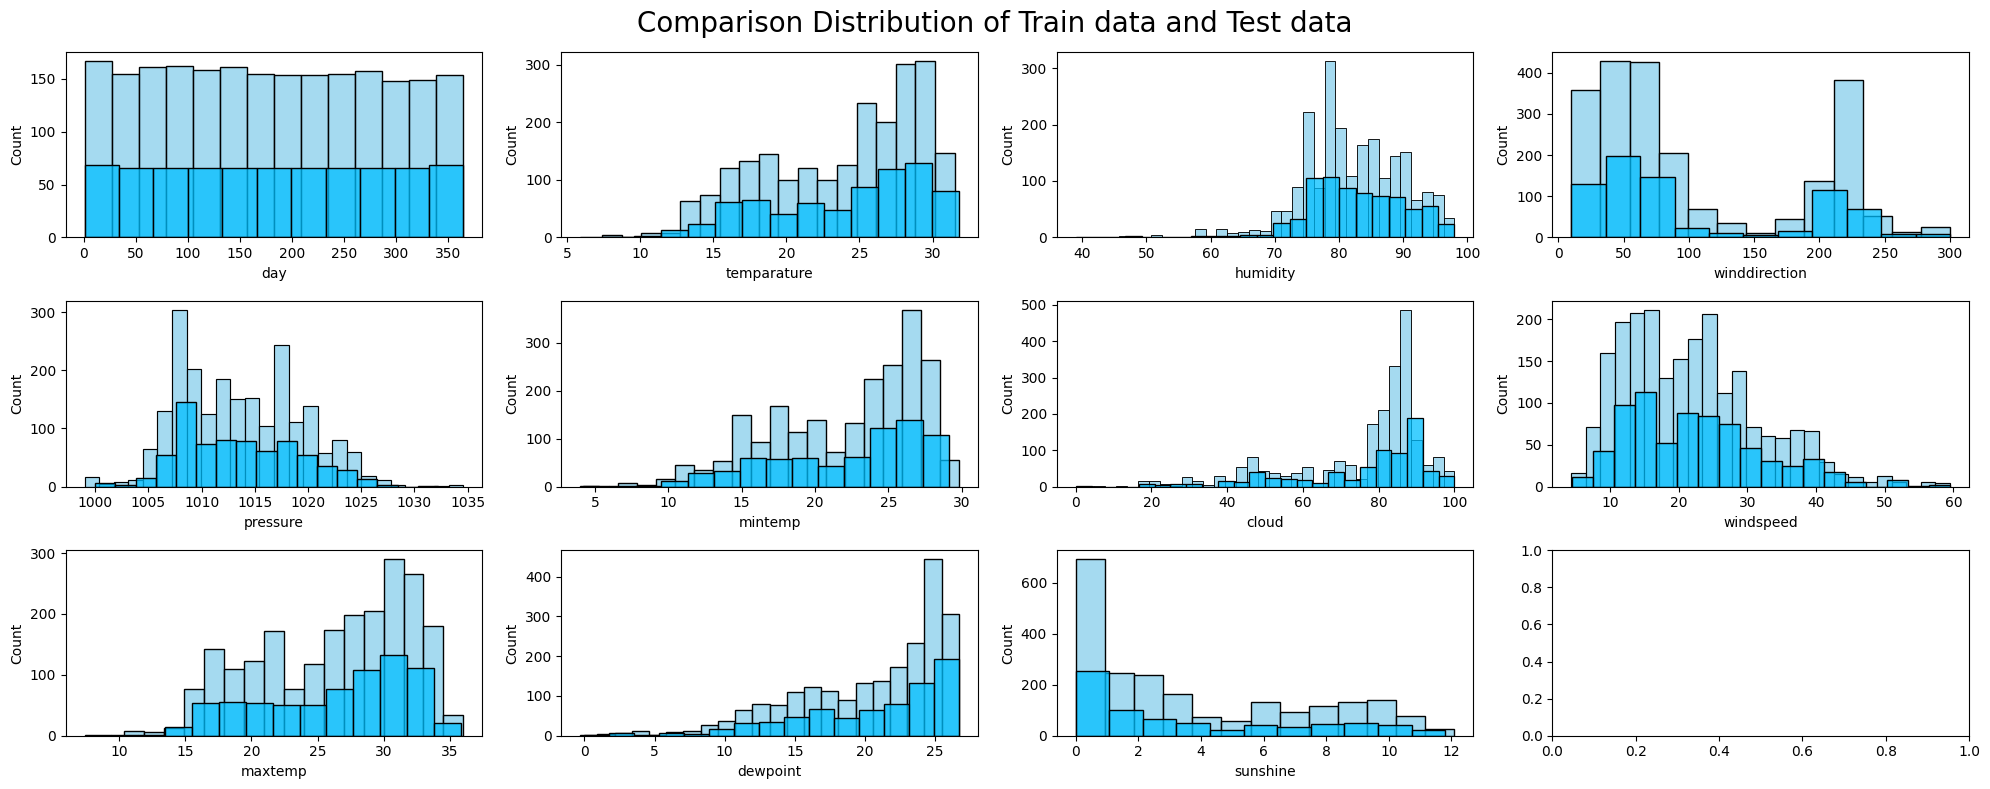

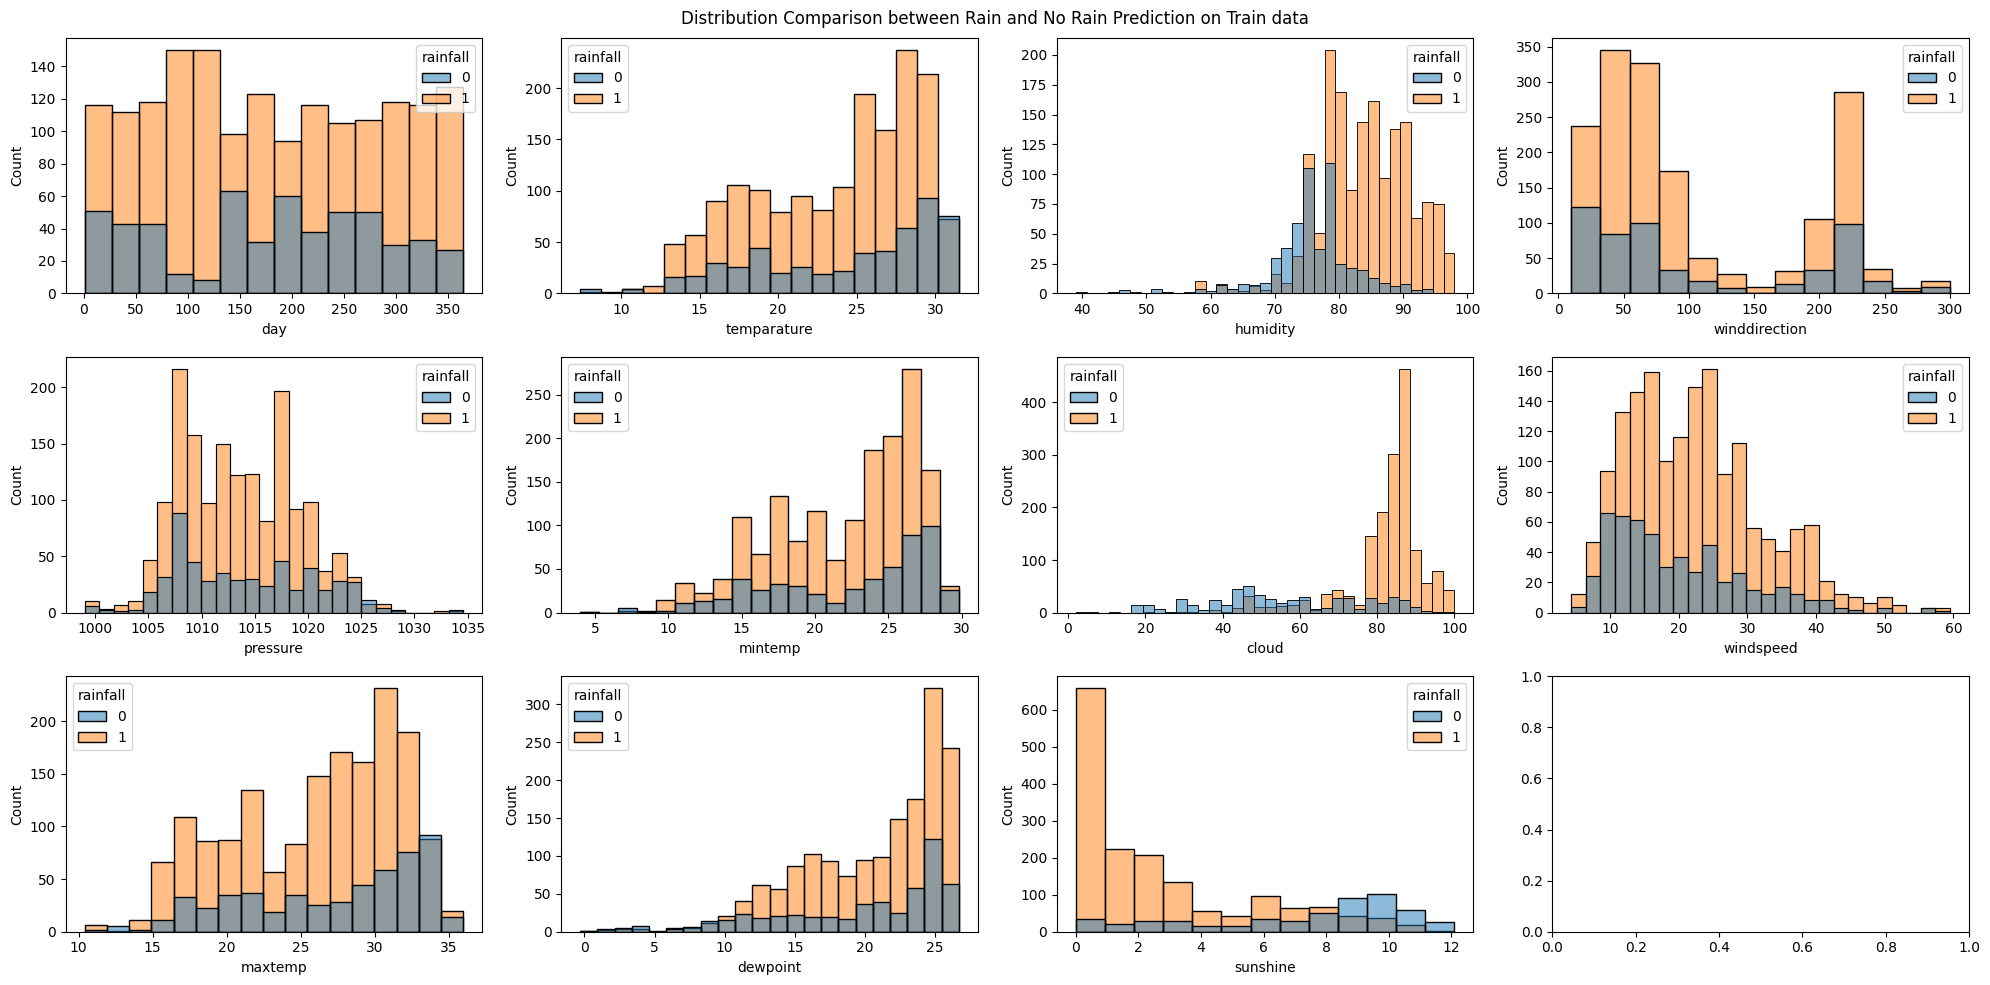

In [10]:
# CHECK DISTRIBUTION


numeric_feature = train_data.select_dtypes(include='number')
numeric_feature = numeric_feature.drop(labels=['id','rainfall'], axis=1)   # DROP NON INDEPENDENT VARIABLE

# DEFINE FIGURE
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,8))

# DISTRIBUTION COMPARISON BETWEEN TRAIN AND TEST DATA
for i, feature in enumerate(numeric_feature):
    sns.histplot(data= train_data, x=feature, color='skyblue', ax = axes[i % 3, i//3])  # DISTRIBUTION FOR TRAINING DATA. MARKED IN BLUE
    sns.histplot(data= test_data, x= feature, color='deepskyblue', ax= axes[i % 3, i//3])    # DISTRIBUTION FOR TEST DATA. MARKED IN RED

plt.suptitle('Comparison Distribution of Train data and Test data', fontsize=20)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,10))

# DISTRIBUTION COMPARISON BETWEEN RAINFALL AND NO RAINFALL ON TRAIN DATA
for i, feature in enumerate(numeric_feature):
    sns.histplot(data= train_data, x=feature, color='skyblue', ax = axes[i % 3, i//3], hue= train_data['rainfall'])

plt.suptitle('Distribution Comparison between Rain and No Rain Prediction on Train data')
plt.tight_layout()
plt.show()  

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  there is no significant difference between the distribution of train data and test data. Features such as <strong>humidity, pressure, mintemp, wind speed, max temp </strong>have data that is close to normal distribution. We can consider normalizing it using Z-Score
</div>

Text(0.5, 1.0, 'Rainfall Distribution')

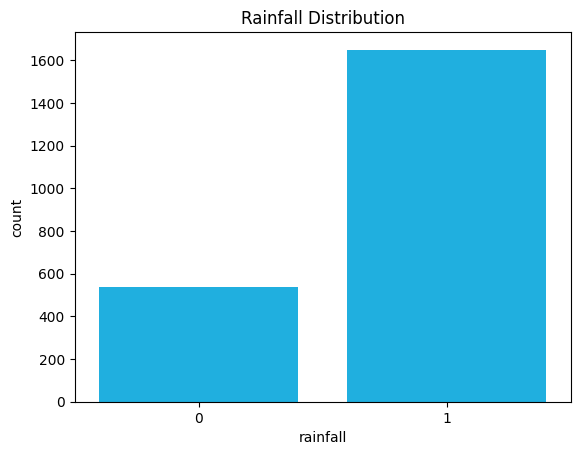

In [11]:
# CHECK DISTRIBUTION FOR TARGET FEATURE (rainfall)

sns.countplot(data= train_data, x='rainfall', color='deepskyblue')
plt.title('Rainfall Distribution')

In [12]:
# DISTRIBUTION RAINFALL PERCENTAGES

class_percentages = (train_data['rainfall'].value_counts(normalize=True) * 100).round(2)

print(f'Class Percentages : {class_percentages}')

Class Percentages : rainfall
1    75.34
0    24.66
Name: proportion, dtype: float64


<p style='font-family:Arial;'> Almost 75% of the labels from rainfall have a value of 1. We will consider whether to do oversampling/undersampling or not.

<p style='font-family:Arial;'>OK, let's check using QQ-plot whether the data is normally distributed or not.

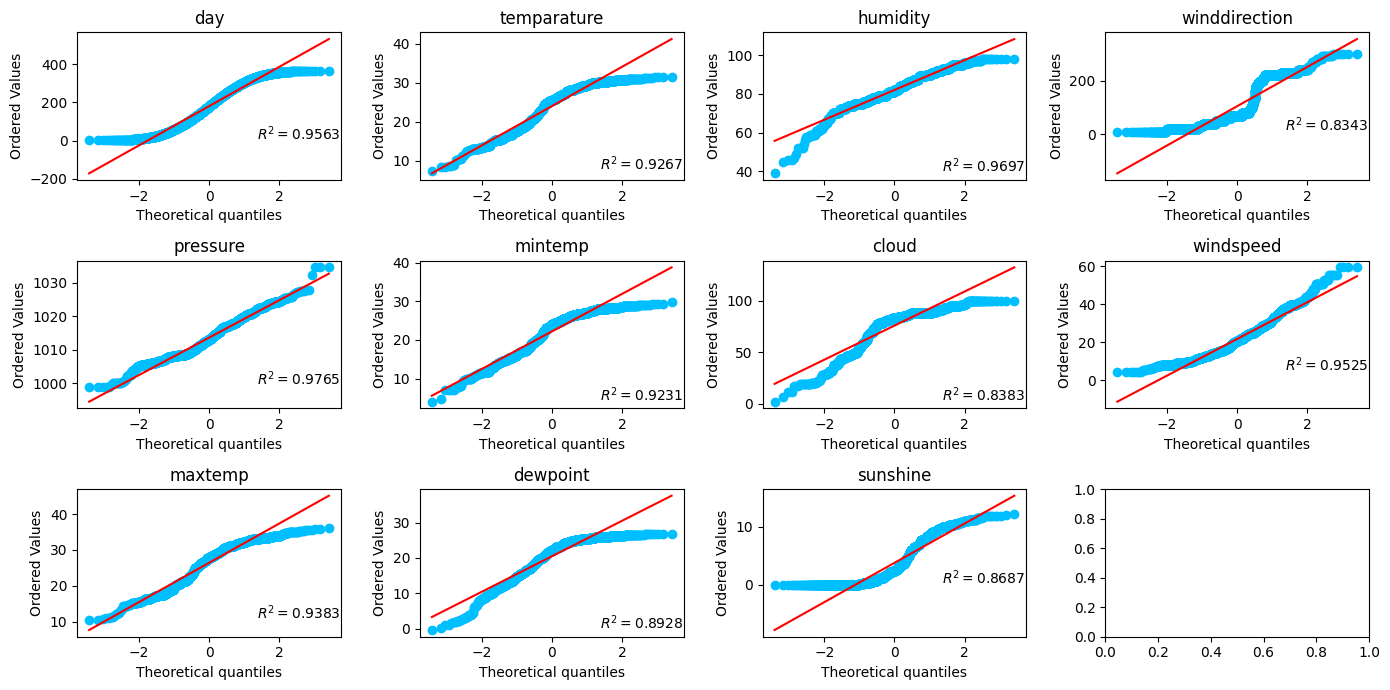

In [13]:
# QQ-PLOT

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14,7))

for i, feature in enumerate(numeric_feature):
    stats.probplot(x= train_data[feature], dist='norm', rvalue= True, plot= axes[i % 3, i//3])

    ax = axes[i % 3, i//3]
    ax.set_title(feature)

    line = ax.get_lines()[0]  
    line.set_color('deepskyblue')

plt.tight_layout()
plt.show()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <p style='font-family:Arial;'> Data points that are straight along the line are a normal distribution. While data points that bend to the left/right are skewed. The R2 value indicates how close the dataset approaches a normal distribution. The higher the R2 value, the closer it is to a normal distribution.
</div>

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    🔗 Check Correlation 🔍
  </p>
</font>

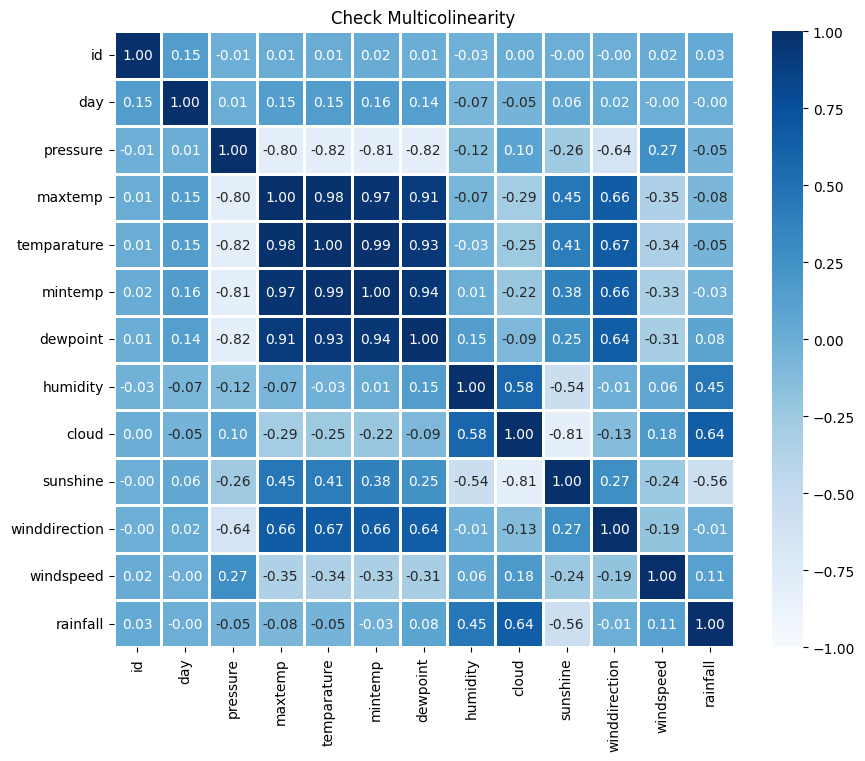

In [14]:
# CHECK CORRELATION

corr_matrix = train_data.corr(method='pearson')

plt.figure(figsize=(10,8))

sns.heatmap(data= corr_matrix, vmax=1, vmin=-1, cmap='Blues', annot=True, fmt='.2f', linewidths=1)
plt.title('Check Multicolinearity')
plt.show()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:15px 20px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>🧮 For independent features that are correlated with each other, we can consider them to:</h4></strong>
  <div style='margin-left:35px; margin-bottom:20px;'>
    <span>1️⃣ Remove pairs of features that have multicollinearity</span><br>
    <span>2️⃣ Using PCA to eliminate Multicollinearity</span><br>
    <span>3️⃣ Combining variables with multicollinearity then deleting the original variables</span><br>
    <span>4️⃣ Transforming multicollinearity data (such as log transformation, square root transformation or others)</span><br>
    <span>5️⃣ Adding Ridge regularization (L2) or Lasso regularization (L1) to add penalty and reduce multicollinearity</span><br>
    <span>6️⃣ Consider feature selection techniques like Recursive Feature Elimination (RFE)</span><br>
    <span>7️⃣ Experiment with feature engineering to combine correlated features</span><br>
    <span>8️⃣ Use ensemble models that can handle correlated features more effectively</span><br>
    <span>9️⃣ Try tree-based models that are less sensitive to multicollinearity</span><br>
    <span>🔟 Test different correlation thresholds for deciding which features to remove</span>
  </div>
</div>



In [15]:
# PAIRPLOT

#cols = train_data.drop(labels='id', axis=1)
#list_cols = cols.columns.tolist()

# CREATE PAIR PLOT
#pairplot = sns.pairplot(cols, height=2, aspect=1.2)

# ADD TITLE FOR EVERY SUBPLOT
#for i in range(len(list_cols)):
#    for j in range(len(list_cols)):
#        pairplot.axes[i, j].set_title(f'{list_cols[i]} vs {list_cols[j]}', fontsize=12)

#plt.tight_layout()
#plt.show()

There are features that are correlated with other independent features, both linearly and non-linearly. now we check correlation between independent variable vs dependent variable (rainfall)

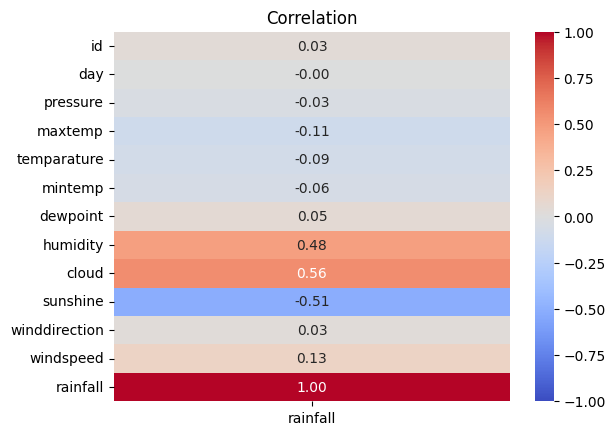

In [16]:
# DEPENDENT VARIABLE CORRELATION

corr_dependent = train_data.corr(method='spearman')
corr_dependent = corr_dependent[['rainfall']]

sns.heatmap(corr_dependent, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation')
plt.show()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📝 Explanation:</h4></strong>
  <div style='margin-left:35px; margin-bottom:20px; margin-left:10px;' >
    <span>1️⃣ Checking non-linear correlation to target feature (rainfall)</span><br>
    <span>2️⃣ The feature with the highest correlation with the target variable is the <strong>cloud</strong> feature of 0.56.</span><br>
    <span>3️⃣ The second highest positive correlation feature is the <strong>humidity</strong> feature with value of 0.48</span><br>
    <span>4️⃣ Then the <strong>sunshine</strong> feature is the feature with the highest negative correlation of -0.51</span><br>
    <span>5️⃣ The rest of the features such as <strong>windspeed, winddirection, dewpoint, mintemp, temparature, maxtemp, pressure, day </strong> have a correlation that is not so large to the target feature (<strong>rainfall</strong>). We can consider deleting it or checking the importance feature to choose only the most important features</span><br>
    <span>6️⃣ We can do feature engineering for features that have low correlation to the target feature to create a new feature that can capture the relationship between interaction patterns and the target feature</span>
  </div>
</div>

ok lets check distribution between independent variable and dependent variable

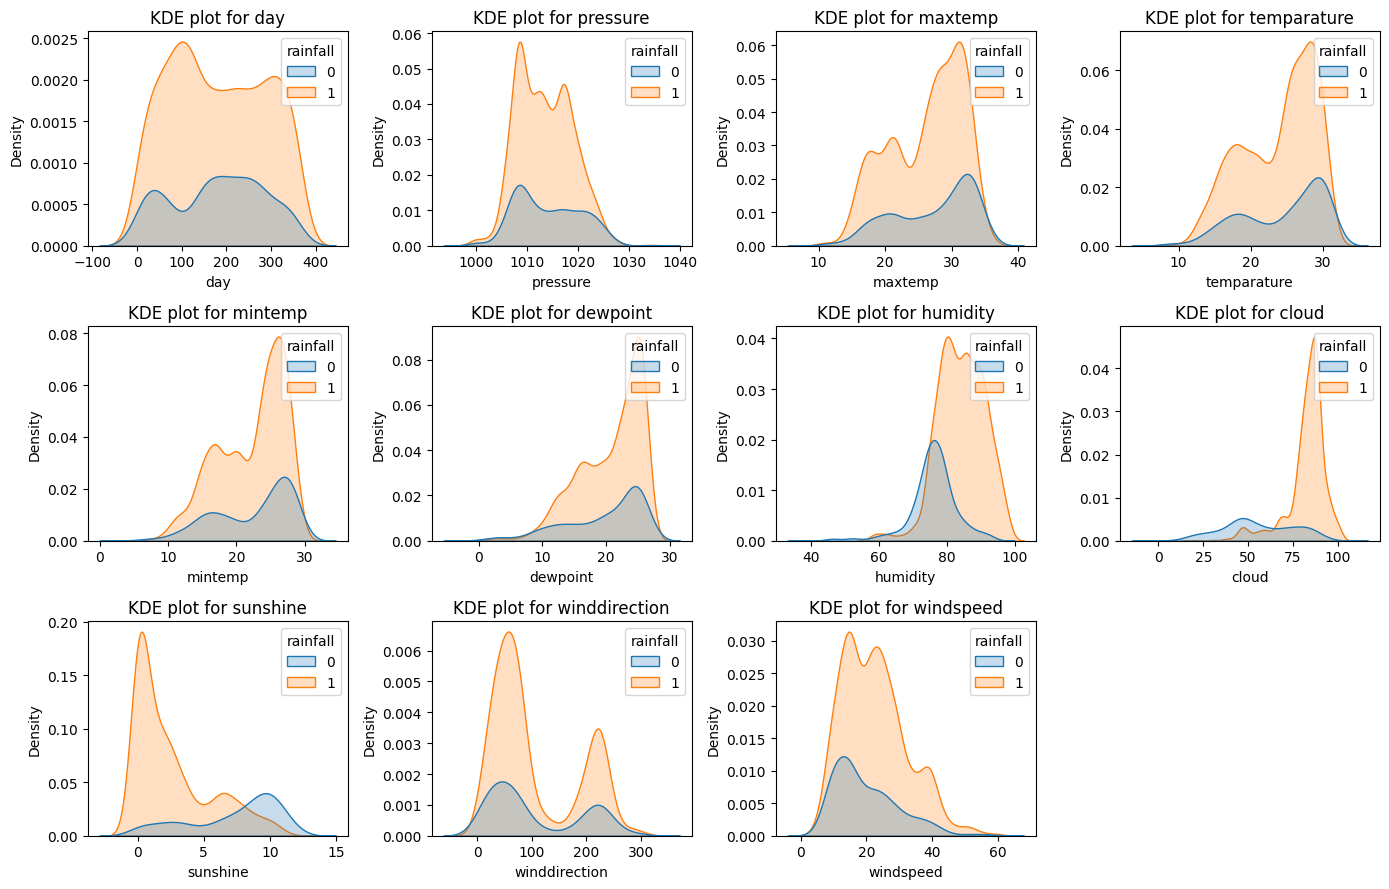

In [17]:
# CEK DATA DISTRIBUTION FOR RAINFALL FEATURE

train_data = train_data.replace([float('inf'), float('-inf')], float('nan'))

cols = train_data.drop(labels=['id', 'rainfall'], axis=1)

plt.figure(figsize=(14,9))
for i , feature in enumerate(cols):
    plt.subplot(3,4,i+1)
    sns.kdeplot(data= train_data, x= feature, hue='rainfall', fill=True)
    plt.title(f'KDE plot for {feature}')

plt.tight_layout()


In [18]:
train_data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📝 Explanation:</h4></strong>
  <div style='margin-left:35px; margin-bottom:20px; margin-left:10px;' >
    <span>1️⃣ There is no significant difference between the two distributions, meaning that rain can occur at any time of the year.</span><br>
    <span>2️⃣ there is no significant difference in temperature and dew point between rain and no rain</span><br>
    <span>3️⃣ rain occurs more often at high humidity between 80-100</span><br>
    <span>4️⃣ rain occurs more often at cloud levels between 75 - 100. Rain rarely occurs at cloud levels below that.</span><br>
    <span>5️⃣ Rain is more likely to occur in low sunlight. The brighter the sunlight, the less likely it is to rain.</span><br>
    <span>6️⃣ there is no significant difference between wind direction and wind speed to determine rain prediction</span>
  </div>
</div>

-------------------------------------------------------------------------------

ok now we will see how far the distribution between rain and no rain classes in the target feature (rainfall)

Text(0.5, 1.0, 'Exploratory Rainfall Patterns')

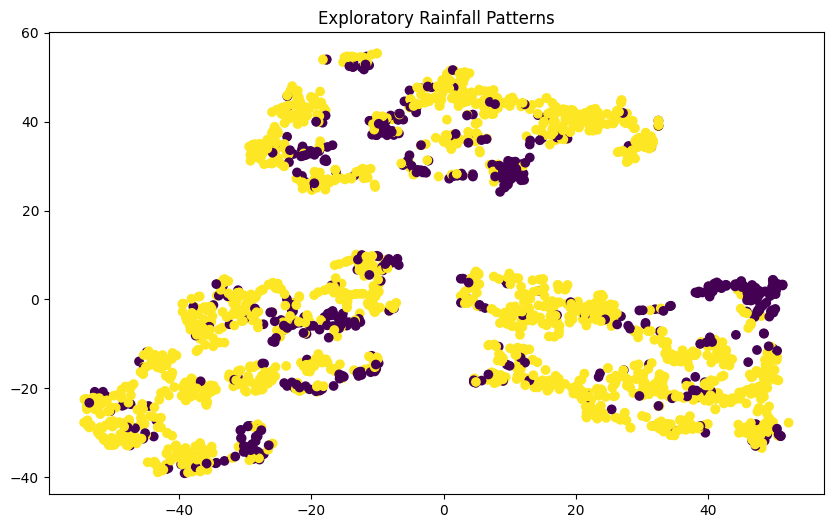

In [19]:
# VISUALIZE SCATTER PLOT

x = train_data.drop(labels=['id', 'rainfall'], axis=1)
y = train_data['rainfall']

tsne = TSNE(n_components=2)
train_data_reduced = tsne.fit_transform(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x= train_data_reduced[:, 0], y = train_data_reduced[:,1], c= y)
plt.title('Exploratory Rainfall Patterns')

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📝 Explanation:</h4></strong>
  <div style='margin-left:35px; margin-bottom:20px; margin-left:10px; font-family:Arial;' >
    <span>1️⃣ In the visualization, 3 separate clusters are formed, each cluster contains a mixture of yellow (rain) and purple (no rain). This indicates that overall the data tends to form 3 different subgroups and within these subgroups there are predictions of rain and no rain.</span><br>
    <span>2️⃣ Each group still has a mix of rainy and non-rainy data, indicating that the same weather factors can lead to rainy or non-rainy conditions, but perhaps in different proportions.</span><br>
  </div>
</div>

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    🔗 Feature Importance : Tree-Based Model 🌳
  </p>
</font>

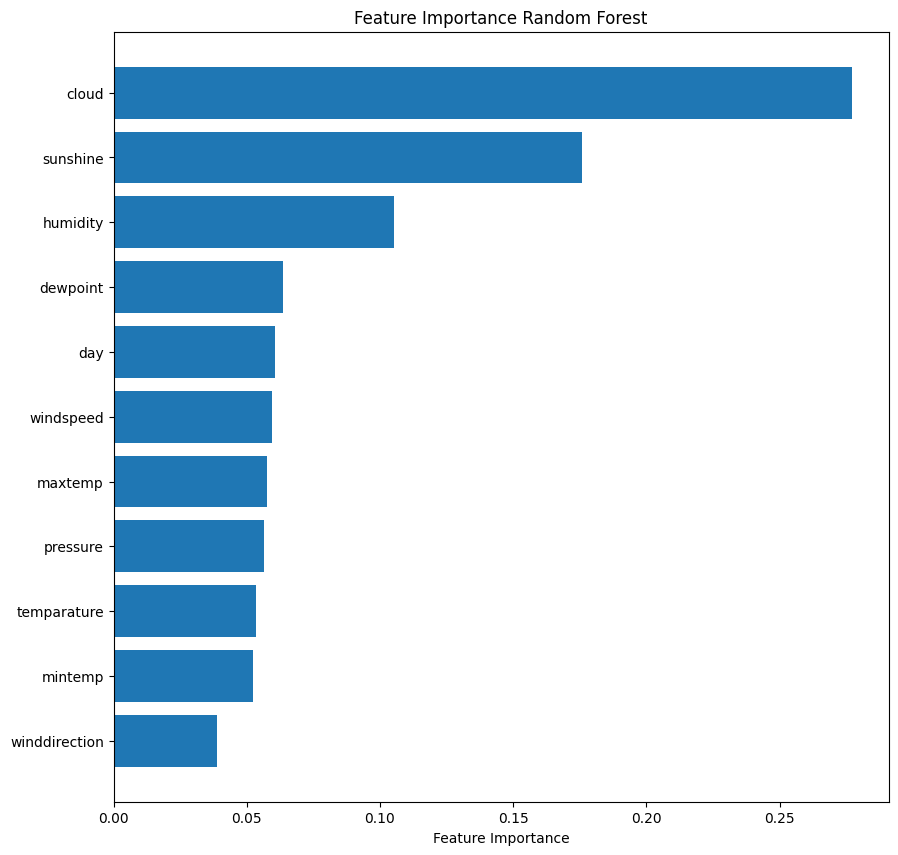

In [20]:
# CHECKING FEATURE IMPORTANCES USING TREE-BASED MODEL

# DEFINE X AND Y
x = train_data.drop(labels=['id', 'rainfall'], axis=1)
y = train_data['rainfall']

forest = RandomForestClassifier(n_estimators=1000)
forest.fit(x, y)


indices = np.argsort(forest.feature_importances_)

# SORTING COLUMNS AND FEATURE IMPORTANCES BASED ON THE SORTED INDEX
sorted_columns = x.columns[indices]
sorted_importances = forest.feature_importances_[indices]

# PLOT
plt.figure(figsize=(10, 10))
plt.barh(y=sorted_columns, width=sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Random Forest')
plt.show()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px; font-family:Arial;">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  There are 3 most important features when using the <strong>Random Forest</strong> model, namely the <strong>cloud, sunshine, humidity</strong> features. It is likely that these 3 features have a big influence on the target feature (<strong>rainfall</strong>)
</div>

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🚨 Check for Outliers 🔎
  </p>
</font>

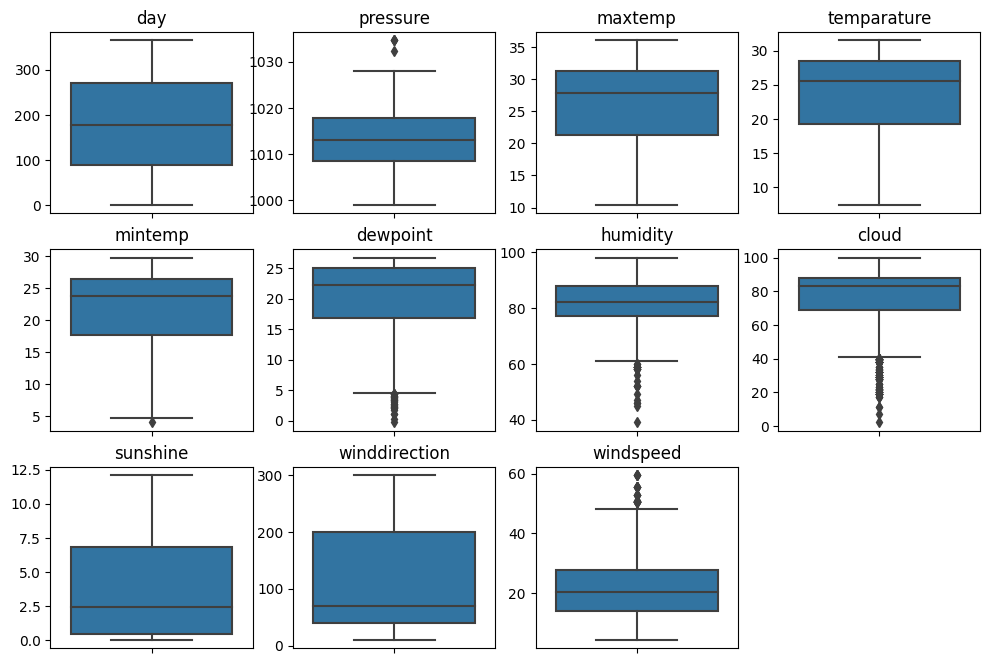

In [21]:
# CHECK OUTLIER

plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_feature):
    plt.subplot(3,4,i+1)
    sns.boxplot(data= train_data, y=feature)
    plt.title(feature)
    plt.ylabel('')

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>💻 Explanation:</h4></strong>
  <ul style='margin-left:35px; margin-bottom:20px; margin-left:10px;' >
      <li> For datasets where the outliers are not too many and far apart, such as the <strong>pressure, mintemp, dewpoint, windspeed </strong> features, we can limit the minimum/maximum values ​​using the <strong>Winsorizing</strong> technique. </li>
      <li> For datasets where outliers are many and far away, such as humidity and cloud features, we can use <strong>robust scaling</strong> techniques to be more resistant to outliers. </li>
  </ul>
</div>

<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
  🧹 Data Preprocessing: Sweep, Clean, and Prepare! 🧼
  </p>
</font>

In [22]:
# DROP UNNECESSARY COLUMN

id = test_data['id']

test_data = test_data.drop(labels=['id'], axis=1) 

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   ❓ Handling Missing Values: Filling the Gaps 🧹
  </p>
</font>

In [23]:
# HANDLING MISSING VALUES

# REPLACE NULL VALUES WITH MEDIAN
test_data['winddirection'] = test_data['winddirection'].fillna(value= test_data['winddirection'].median())  

test_data['winddirection'].isna().sum()

0

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🛠️ Feature Engineering: Building Powerful Features ⚡
  </p>
</font>

In [24]:
# FEATURE ENGINEERING . CREATE NEW FEATURE

combined_data = pd.concat((train_data, test_data))  # MERGE TRAIN AND TEST DATA


combined_data['temp_range'] = combined_data['maxtemp'] - combined_data['mintemp']

# TO REFLECT THE RELATIVE HUMIDITY OF THE AIR
combined_data['temp_dew_spread'] = combined_data['temparature'] - combined_data['dewpoint']

'''combines temperature, dew point, and humidity to measure the “felt” temperature. High values ​​indicate hot, humid conditions, 
   which are often associated with the potential for convective precipitation.''' 
combined_data['heat_index'] = 0.5 * (combined_data['temparature'] + combined_data['dewpoint']) + 0.1 * combined_data['humidity'] - 10

# CREATE A NEW DIRECTION FEATURE SO THAT THE MODEL UNDERSTANDS 'WINNDDIRECTION' PATTERNS
combined_data['wind_east'] = combined_data['windspeed'] * np.cos(combined_data['winddirection'])
combined_data['wind_north']= combined_data['windspeed'] * np.sin(combined_data['winddirection'])

# INTERACTION BETWEEN HUMIDITY AND CLOUD
combined_data['humidity_cloud'] = combined_data['humidity'] * combined_data['cloud']

# THIS FEATURE MEASURES THE RATIO OF HOW MUCH SUN LIGHT IS BLOCKED BY CLOUDS
combined_data['sunshine_cloud_ratio'] = combined_data['sunshine'] / (combined_data['cloud'] + 1e-5)

# THE COMBINATION OF DEWPOINT AND HUMIDITY REFLECTS THE WATER VAPOR CONTENT IN THE AIR
combined_data['moisture_index'] = combined_data['dewpoint'] * combined_data['humidity']

# DESCRIBING THE TEMPERATURE FELT DUE TO THE COMBINATION OF TEMPERATURE AND WIND
combined_data['wind_chill'] = 13.12 + 0.6215 * combined_data['temparature'] - 11.37 * (combined_data['windspeed']**0.16) + 0.3965 * combined_data['temparature'] * (combined_data['windspeed']**0.16)  


def set_high_rain(row):
   if row['humidity'] > 80 and row['cloud'] > 80:
      return 1
   else:
      return 0

combined_data['high_rain_risk'] = combined_data.apply(set_high_rain, axis=1)


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------


# RE-SEPARATE TRAIN AND TEST DATA
TRAIN_SIZE = 2190
new_train_data = combined_data[:TRAIN_SIZE]
new_test_data  = combined_data[TRAIN_SIZE:]


# DISPLAY INFORMATION
print('Train data : ')
display(new_train_data)

new_test_data = new_test_data.drop(labels=['id', 'rainfall'], axis=1)
print('Test data  : ')
display(new_test_data)

Train data : 


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,...,temp_range,temp_dew_spread,heat_index,wind_east,wind_north,humidity_cloud,sunshine_cloud_ratio,moisture_index,wind_chill,high_rain_risk
0,0.0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,...,1.3,1.2,18.70,-16.381503,-5.242743,7656.0,0.012500,1687.8,20.874899,1
1,1.0,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,...,0.4,1.5,15.65,21.132756,-5.746009,8645.0,0.000000,1463.0,15.972514,1
2,2.0,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,...,4.8,6.8,10.20,11.463078,14.007421,3525.0,0.176596,697.5,15.200930,0
3,3.0,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,...,1.2,1.0,16.80,-33.905902,-10.851258,9025.0,0.000000,1596.0,16.545380,1
4,4.0,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,...,6.1,8.8,9.20,-16.540064,18.478806,2340.0,0.080000,499.2,17.745148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185.0,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,...,4.1,0.7,19.95,-14.739331,16.467001,8536.0,0.001136,1930.3,20.668324,1
2186,2186.0,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,...,0.9,2.0,15.40,34.063301,-9.261832,8008.0,0.000000,1392.3,15.894328,1
2187,2187.0,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,...,4.7,3.7,12.35,-21.942262,24.514223,6241.0,0.063291,995.4,14.668780,0
2188,2188.0,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,...,2.6,0.5,14.15,-12.004885,13.412037,8556.0,0.001075,1352.4,14.081933,1


Test data  : 


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,temp_range,temp_dew_spread,heat_index,wind_east,wind_north,humidity_cloud,sunshine_cloud_ratio,moisture_index,wind_chill,high_rain_risk
0,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,...,4.8,0.9,14.95,23.448674,-6.375709,9504.0,0.000000,1430.4,14.433839,1
1,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,...,1.7,1.4,15.50,34.063301,-9.261832,9603.0,0.000000,1464.7,14.836110,1
2,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,...,1.8,1.5,8.25,-11.271253,12.592412,8256.0,0.000000,765.4,8.192014,1
3,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,...,5.4,7.8,10.90,20.648952,46.195030,3375.0,0.157778,712.5,15.421232,0
4,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,...,9.7,9.5,5.85,7.916792,17.711138,3332.0,0.187755,292.4,12.217425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,...,2.1,3.9,15.25,13.997215,31.314022,9120.0,0.000000,1315.2,16.326792,1
726,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,...,7.2,2.1,14.85,-16.806839,18.776852,6240.0,0.020000,1248.0,17.341903,0
727,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,...,4.0,3.0,16.20,21.132756,-5.746009,8832.0,0.000000,1426.0,18.006437,1
728,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,...,1.3,0.2,19.30,38.116158,-10.363807,8742.0,0.000000,1861.2,19.355390,1


<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📖 Explanation:</h4></strong>
  <div style='margin-left:35px; margin-bottom:20px; margin-left:10px; font-family:Arial;' >
      I perform feature engineering like this to capture complex relationships and interactions between variables that may not be visible to the model using only raw features. These features also reduce the model's dependence on raw data and allow for better interpretation of weather conditions, thereby improving prediction accuracy and the model's ability to generalize to complex weather patterns. <br><br>
      ok now let's show the correlation of the new feature with the target variable (<strong>rainfall</strong>)
  </div>
</div>

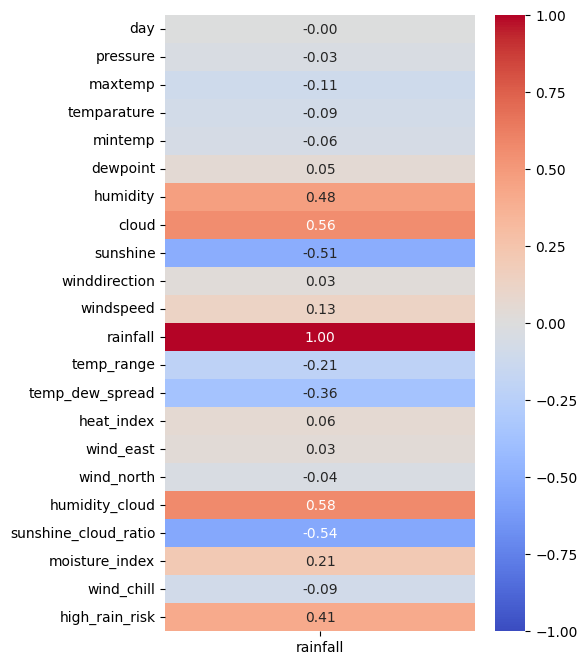

In [25]:
# SHOW CORRELATION FOR NEW FEATURE

corr_matrix = combined_data.corr(method='spearman')
corr_matrix = corr_matrix[['rainfall']]    # SHOW ONLY RAINFALL FEATURE
corr_matrix = corr_matrix.drop(labels=['id'], axis=0)

plt.figure(figsize=(5,8))
sns.heatmap(data= corr_matrix, vmax=1, vmin=-1, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🚨 Handling Outliers: Removing Extremes 🛑
  </p>
</font>

Before doing feature scaling, let's first look at the distribution of the new features using a boxplot.

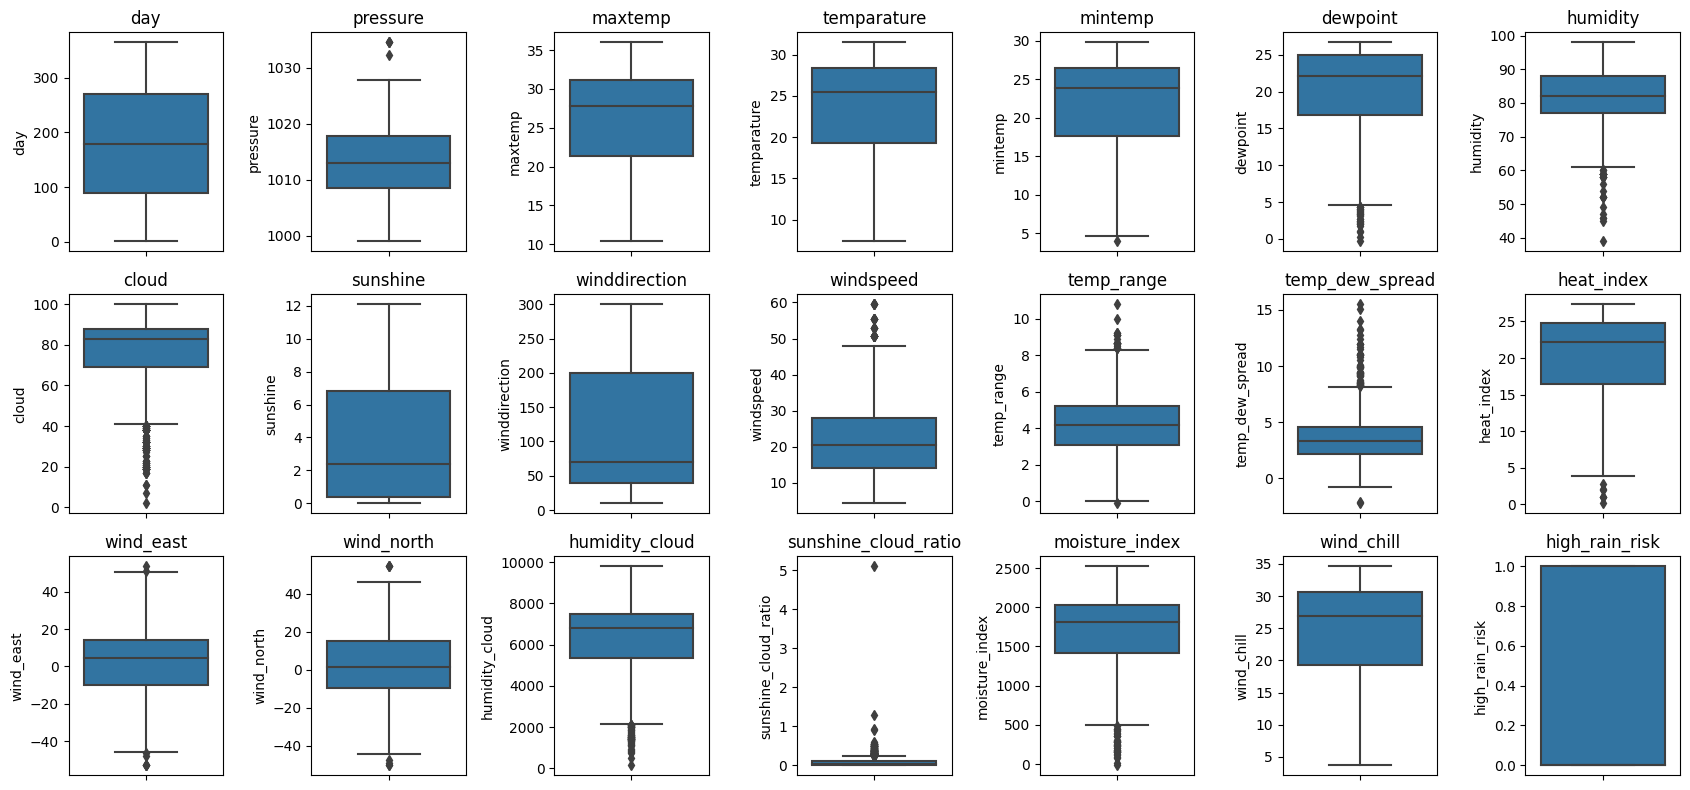

In [26]:
# BOXPLOT FOR NEW FEATURES

#new_features = ['temp_range', 'temp_dew_spread', 'heat_index', 'wind_east', 'wind_north', 'humidity_cloud', 'sunshine_cloud_ratio', 'moisture_index', 'wind_chill', 'high_rain_risk']
numeric_features = new_train_data.select_dtypes(include='number').drop(labels=['id', 'rainfall'], axis=1)

plt.figure(figsize=(17,8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3,7,i+1)
    sns.boxplot(data= new_train_data, y= feature)
    plt.title(feature)

plt.tight_layout()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📖 Explanation:</h4></strong>
  <ol style='font-family: Arial;'>
      <li> for features such as <strong>dewpoint, humidity, cloud, windspeed, temp_range, temp_dew_spread, humidity_cloud, sunshine_cloud_ratio, moisture_index </strong>have quite a lot of outliers, we can consider doing winsorize</li>
      <li> and the rest we ignore</li>
</div>

<ipython-input-27-5f0b090c0d15>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['sunshine_cloud_ratio'] = winsorize(a = new_train_data['sunshine_cloud_ratio'], limits=[0, 0.01])


Text(0.5, 1.0, 'sunshine_cloud_ratio')

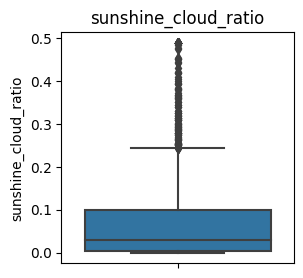

In [27]:
# WE CAN HANDLE OUTLIER VALUES USING WINSORIZING TECHNIQUES

# SELECT FEATURE
#numeric_feature = train_data.select_dtypes(include='number')
#numeric_feature = numeric_feature.drop(columns=['id', 'rainfall'])

''' winsorize is a technique for handling outliers without removing them by replacing the extreme values ​​with the maximum/minimum threshold values. '''


# DO WINSORIZING FOR TRAIN DATA
#train_data['pressure'] = winsorize(a = train_data['pressure'], limits=[0.05, 0.05])
#train_data['humidity'] = winsorize(a = train_data['humidity'], limits=[0.15, 0])
#train_data['cloud'] = winsorize(a = train_data['cloud'], limits=[0.1, 0])
#train_data['windspeed'] = winsorize(a = train_data['windspeed'], limits=[0, 0.08])
new_train_data['sunshine_cloud_ratio'] = winsorize(a = new_train_data['sunshine_cloud_ratio'], limits=[0, 0.01])

# DO WINSORIZING FOR TEST DATA
#test_data['pressure'] = winsorize(a = test_data['pressure'], limits=[0.05, 0.05])
#test_data['humidity'] = winsorize(a = test_data['humidity'], limits=[0.15, 0])
#test_data['cloud'] = winsorize(a = test_data['cloud'], limits=[0.1, 0])
#test_data['windspeed'] = winsorize(a = test_data['windspeed'], limits=[0, 0.08])
new_test_data['sunshine_cloud_ratio'] = winsorize(a = new_test_data['sunshine_cloud_ratio'], limits=[0, 0.01])


# VISUALIZE AFTER WINSORIZE
plt.figure(figsize=(3,3))
sns.boxplot(data= new_train_data, y = 'sunshine_cloud_ratio')
plt.title('sunshine_cloud_ratio')

After much consideration, we only perform winsorize for the sunshine_cloud_ratio feature which has very large outliers.

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   ✂️ Split Dataset: Training & Validation 🧳
  </p>
</font>

In [28]:
# SPLIT DATASET

x = new_train_data.drop(labels=['id', 'rainfall'], axis=1)
y = new_train_data['rainfall']

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.20, random_state= 2025, shuffle=True)

print(f'Type : {type(x_train)}')
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape  : {x_val.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape  : {y_val.shape}')

Type : <class 'pandas.core.frame.DataFrame'>
x_train shape : (1752, 21)
x_test shape  : (438, 21)
y_train shape : (1752,)
y_test shape  : (438,)


<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   📏 Feature Scaling: Standardizing Data ⚖️
  </p>
</font>

In [112]:
# FEATURE SCALING

cols_to_robust = ['pressure', 'dewpoint', 'humidity', 'cloud', 'windspeed', 'temp_range', 'temp_dew_spread', 'humidity_cloud', 'sunshine_cloud_ratio', 'moisture_index']
cols_to_zscore = ['day','maxtemp','temparature','mintemp','sunshine','winddirection', 'heat_index', 'wind_east', 'wind_north', 'wind_chill']

# DEFINE NORMALIZATION TECHNIQUE
robust = RobustScaler()
zscore = StandardScaler()

# FIT AND TRANSFORM TRAIN DATA
x_train[cols_to_robust] = robust.fit_transform(x_train[cols_to_robust])
x_train[cols_to_zscore] = zscore.fit_transform(x_train[cols_to_zscore])

# TRANSFORM VALIDATION DATA
x_val[cols_to_robust] = robust.transform(x_val[cols_to_robust])
x_val[cols_to_zscore] = zscore.transform(x_val[cols_to_zscore])

# TRANSFORM TEST DATA
#new_test_data = copy.deepcopy(test_data)
new_test_data[cols_to_robust] = robust.transform(new_test_data[cols_to_robust])
new_test_data[cols_to_zscore] = zscore.transform(new_test_data[cols_to_zscore])


# DISPLAY INFORMATION
type(x_train) , x_train.shape, x_val.shape, type(test_data), test_data.shape , x_train.columns

(pandas.core.frame.DataFrame,
 (1752, 21),
 (438, 21),
 pandas.core.frame.DataFrame,
 (730, 11),
 Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
        'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
        'temp_range', 'temp_dew_spread', 'heat_index', 'wind_east',
        'wind_north', 'humidity_cloud', 'sunshine_cloud_ratio',
        'moisture_index', 'wind_chill', 'high_rain_risk'],
       dtype='object'))

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  For feature scaling, I use the <strong>robust scaling normalization</strong> technique for features that have significant outliers and skewed distributions. While I use the <strong>Z-score normalization</strong> technique for features that approach a normal distribution and do not have too many outliers.

  lets display normalized data
</div>

In [30]:
# SHOW NORMALIZED DATA
x_val

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,temp_range,temp_dew_spread,heat_index,wind_east,wind_north,humidity_cloud,sunshine_cloud_ratio,moisture_index,wind_chill,high_rain_risk
1310,0.321768,-0.544444,0.939450,0.983635,0.853521,0.481481,0.000000,0.105263,-0.910255,1.575577,...,0.476190,-0.086957,1.014561,-1.390033,-1.081238,0.079407,-0.254581,0.524323,0.978829,1
584,0.359874,-1.422222,1.187839,1.234259,1.012571,0.469136,-0.454545,-2.105263,1.564839,-0.565256,...,0.761905,0.521739,1.033776,-0.751042,-0.317327,-1.670892,2.018465,0.295700,1.205848,0
1962,-0.421295,-0.411111,0.886224,1.080029,1.151740,0.432099,0.363636,-0.052632,-0.743395,1.449646,...,-0.380952,0.304348,1.101026,1.116299,-0.018916,0.118632,-0.174120,0.639880,1.072678,1
951,0.378927,-0.511111,0.832997,0.964356,0.833639,0.271605,-0.727273,-1.947368,0.563677,0.064401,...,0.238095,0.608696,0.687917,-1.454467,-0.189016,-1.626405,1.026126,-0.029885,0.958579,0
178,-0.030711,-0.566667,0.744287,0.848683,0.893283,0.456790,0.000000,0.052632,-0.659965,1.197783,...,-0.142857,-0.304348,0.928097,0.252216,-0.885414,0.040182,-0.138870,0.497094,0.846181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,-0.602298,-0.288889,0.815255,0.790847,0.833639,0.160494,0.636364,-0.631579,0.841778,1.197783,...,0.190476,0.608696,0.803203,0.234738,-0.854257,-0.232002,0.708689,0.442304,0.791296,0
1097,-1.707366,0.377778,-1.721864,-1.618997,-1.492467,-1.320988,-0.272727,0.421053,-1.021496,-0.565256,...,-1.047619,0.391304,-1.742700,-3.330772,-1.138377,0.184166,-0.305139,-1.520173,-1.795957,0
463,-0.792827,0.388889,0.424929,0.482387,0.455896,0.123457,-0.272727,0.000000,-0.298434,1.575577,...,0.047619,0.043478,0.428523,-1.130990,-0.879759,-0.118154,0.031406,0.014445,0.485210,0
1472,-1.612102,1.211111,-1.455733,-1.310537,-1.353298,-1.037037,-1.181818,-1.473684,-0.354054,-0.565256,...,-0.666667,0.086957,-1.560164,-3.330772,-1.138377,-1.439369,0.163670,-1.445957,-1.466442,0


<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   ➕ Oversampling: Balancing the Dataset ⚖️
  </p>
</font>

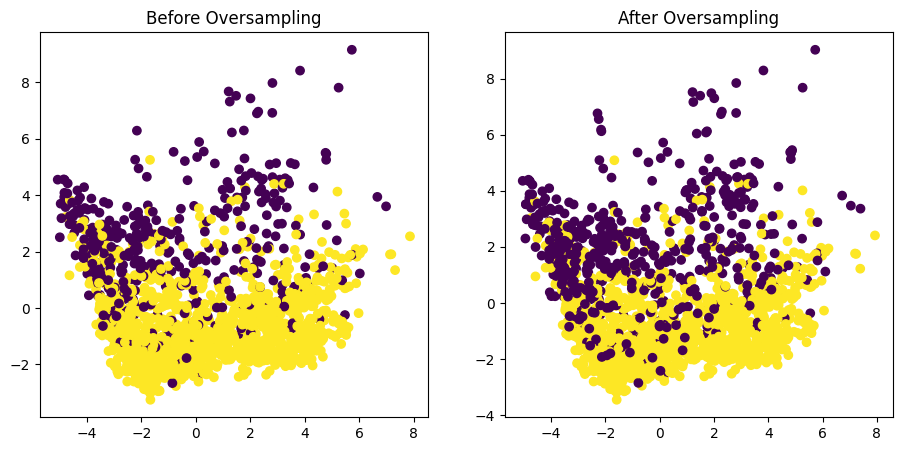

In [31]:
# OVERSAMPLING FOR HANDLE IMBALANCED DATASET

# SMOTE
#smote = SMOTE(sampling_strategy= 0.5, random_state= seed_value, k_neighbors=4)
#x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# BORDERLINE SMOTE
#border_smote = BorderlineSMOTE(sampling_strategy=0.5, random_state= seed_value, k_neighbors=4, m_neighbors=3, kind='borderline-2')
#x_resampled, y_resampled = border_smote.fit_resample(x_train, y_train)

# ADASYN 
#adasyn = ADASYN(sampling_strategy=0.5, random_state= seed_value, n_neighbors=4)
#x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# SVM SMOTE
svm_smote = SVMSMOTE(sampling_strategy=0.45, random_state= seed_value, m_neighbors = 3, k_neighbors=4)
x_resampled, y_resampled = svm_smote.fit_resample(x_train, y_train)


# -------------------------------------------------------------------------------------------------------------------------------------


# REDUCTION DIMENSION TO VISUALIZE DATASET
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)   # REDUCE DIMENSION FOR x_train
x_resampled_pca = pca.fit_transform(x_resampled)  # REDUCE DIMENSION FOR x_resampled (Oversampled Data)


# VISUALIZE 2D SCATTER PLOT
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

axes[0].scatter(x = x_pca[:,0], y = x_pca[:,1], c = y_train)
axes[0].set_title('Before Oversampling')

axes[1].scatter(x = x_resampled_pca[:,0], y = x_resampled_pca[:,1], c = y_resampled)
axes[1].set_title('After Oversampling')

plt.show()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 17px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px; margin-top:15px;">
  <h5 style="font-size: 18px; margin-bottom: 0px; font-family:Arial;">
  In handling oversampling, I have done various oversampling techniques... starting from <strong>Simple SMOTE, BorderlineSMOTE,  ADASYN </strong>, and last <strong>SVM SMOTE</strong>. After doing many experiments, I chose <strong>SVM SMOTE</strong> as the Oversampling Technique. because <strong>SVM SMOTE</strong> gives quite satisfactory results compared to the others. <br>
</div>

In [32]:
# DISTANCE BETWEEN CLASS A (RAIN) AND B (NO RAIN)

#lda = LinearDiscriminantAnalysis(n_components=1)
#x_reduce = lda.fit_transform(x_train, y_train)

#plt.figure(figsize=(12,3))

#plt.subplot(1,2,1)
#plt.scatter(x = x_reduce[:,0], y= np.zeros_like(x_reduce[:,0]), c = y_train)
#plt.title('Before Oversampling')
#plt.yticks([0])


# -------------------------------------------------------------------------------------------------


#lda = LinearDiscriminantAnalysis(n_components=1)
#x_reduce = lda.fit_transform(x_resampled, y_resampled)

#plt.subplot(1,2,2)

#plt.scatter(x= x_reduce[:,0], y= np.zeros_like(x_reduce[:,0]), c= y_resampled)
#plt.title('After Oversampling')
#plt.yticks([0])


#plt.suptitle('Distance Between Rain Class and No Rain Class')
#plt.tight_layout()

<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    💡 Machine Learning Model: Maximizing Result with Advanced Model Fusion 💥
  </p>
</font>

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px;">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4 style='font-size:22px; '><strong>ℹ️ Info:</h4></strong>
      <div style='font-family:Arial; font-size:18px;'>
          in developing a machine learning model, I will use Ensemble and Boosting Techniques to create a Machine learning model. My goal in using these techniques is so that the model can learn </strong>Non-Linear Patterns</strong> and can handle <strong>Imbalanced data</strong>.
      </div><br>
      <div style='font-family:Arial; font-size:18px'>
          The <strong>Boosting Model</strong> works by combining several weaker models (<strong>weak learners</strong>) into one stronger model and focuses on correcting errors made by previous models in an iterative sequence, so that the final model has more accurate and robust prediction capabilities for complex or unbalanced data.
      </div> <br>
      <div style='font-size:20px; font-family:Arial;'>
          The boosting techniques that I use include:
          <ol>
              <li><strong>Gradient Boosting Machine</strong></li>
              <li><strong>Light Gradient Boosting Machine</strong></li>
              <li><strong>Adaptive Boosting</strong></li>
              <li><strong>Xtreme Gradient Boosting Machine</strong></li>
              <li><strong>Category Boosting</strong></li>
          </ol>
      </div><br>
      <div style='font-family:Arial; font-size:18px;'> 
          Then after I create all types of boosting models, I will combine / fuse all of these models using the <strong>Stacking Technique</strong>. <br>The goal is to combine them to create a stronger and more sophisticated model and overcome the weaknesses of each existing model.
</div>

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🤖 Gradient Boosting Machine ⚡
  </p>
</font>

In [33]:
# GRADIENT BOOSTING MACHINE

# FUNCTION TO TRAIN AND FIND BEST HYPERPARAMETERS WITH OPTUNA
def gbr_objective(trial):

    # SET HYPERPARAMETER VALUE RANGE
    n_estimators     = trial.suggest_int('n_estimators', 50,2000)
    learning_rate    = trial.suggest_uniform('learning_rate', 0.001, 1)
    max_depth        = trial.suggest_int('max_depth', 2, 16)
    min_sample_split = trial.suggest_int('min_samples_split', 2, 25)
    max_features     = trial.suggest_int('max_features', 5, 60)
    
    # DECLARATE THE MODEL AND ITS HYPERPARAMETERS
    gbr = GradientBoostingClassifier(
        n_estimators      = n_estimators,
        learning_rate     = learning_rate,
        max_depth         = max_depth,
        min_samples_split = min_sample_split,
        max_features      = max_features,
        random_state      = seed_value
        )
       
    # CREATE SCORE EVALUATION (CV)
    score = cross_val_score(estimator= gbr, X= x_resampled, y= y_resampled, scoring='roc_auc')

    return score.mean()


# BUILD OPTUNA 
#study = optuna.create_study(direction='maximize')

# START TO FIND BEST HYPERPARAMETERS
#study.optimize(func= gbr_objective, n_trials=20)

#print(f'Best Hyperparameter : {study.best_params}')
#print(f'Best Score          : {study.best_value}')

# TAKE THE BEST PARAMETERS
#gbr_best_params = study.best_params


'''Best Params : Trial 18 finished with value: 0.914942613286987
{'n_estimators': 1588, 'learning_rate': 0.1867130929904072, 'max_depth': 16, 'min_samples_split': 11, 'max_features': 15}
'''

"Best Params : Trial 18 finished with value: 0.914942613286987\n{'n_estimators': 1588, 'learning_rate': 0.1867130929904072, 'max_depth': 16, 'min_samples_split': 11, 'max_features': 15}\n"

In [34]:
# FIT MODEL GBM

gbr_best_params = {'n_estimators': 1588, 'learning_rate': 0.1867130929904072, 'max_depth': 16, 'min_samples_split': 11, 'max_features': 15}

gbm = GradientBoostingClassifier(random_state= seed_value, **gbr_best_params)
gbm.fit(x_resampled,y_resampled)

GradientBoostingClassifier(learning_rate=0.1867130929904072, max_depth=16,
                           max_features=15, min_samples_split=11,
                           n_estimators=1588, random_state=2024)

Text(0.5, 1.0, 'Feature Important GBM')

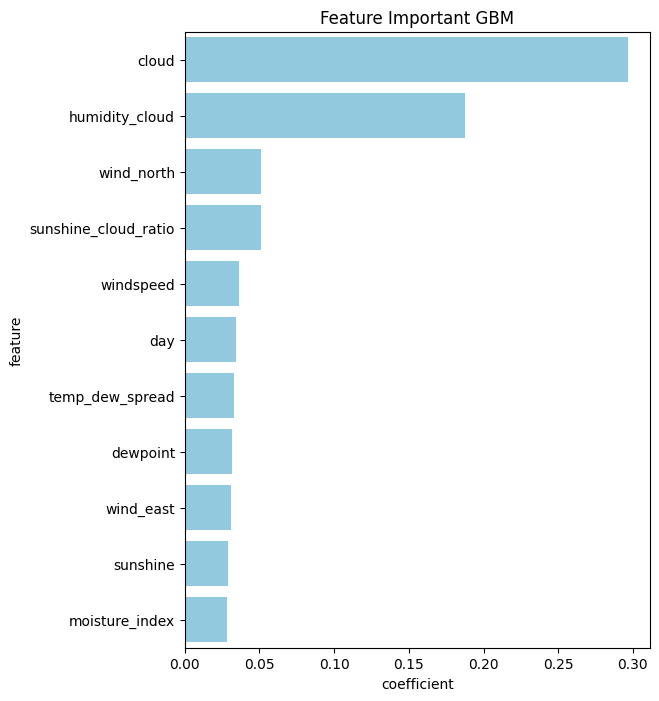

In [35]:
# FEATURE IMPORTANCE FOR GBM MODEL

# CREATE DATAFRAME
features_importance = pd.DataFrame({
    'feature' : gbm.feature_names_in_,   # GET FEATURE NAME
    'coefficient' : gbm.feature_importances_  # GET COEFFICIENT FOR EACH FEATURE
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop=True)  # SORT IT BY DESCENDING AND RESET INDEX

top_10 = features_importance.loc[:10, :]
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='skyblue')
plt.title('Feature Important GBM')


<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🤖 LGBM ⚡
  </p>
</font>

In [36]:
%%capture
# FUNCTION TO FIND BEST HYPERPARAMETER
def lgbm_objective(trial):

    # SET HYPERPARAMETERS VALUE RANGE
    num_leaves        = trial.suggest_int('num_leaves',20,100)
    max_depth         = trial.suggest_int('max_depth', 2, 15)
    learning_rate     = trial.suggest_float('learning_rate', 0.001, 0.8)
    n_estimators      = trial.suggest_int('n_estimators', 100, 2000)
    min_child_weight  = trial.suggest_int('min_child_weight', 0.5, 5)
    min_child_samples = trial.suggest_int('min_child_samples', 7, 20)
    subsample         = trial.suggest_uniform('subsample', 0.4, 1)
    reg_alpha         = trial.suggest_float('reg_alpha', 0.02, 15)
    reg_lambda        = trial.suggest_float('reg_lambda', 0.02, 15)

    # DECLARATE LGBM MODEL
    lgbm = lightgbm.LGBMClassifier(boosting_type    ='gbdt',
                             num_leaves       = num_leaves,
                             max_depth        = max_depth,
                             learning_rate    = learning_rate,
                             n_estimators     = n_estimators,
                             min_child_weight = min_child_weight,
                             min_child_samples= min_child_samples,
                             subsample        = subsample,
                             reg_alpha        = reg_alpha,
                             reg_lambda       = reg_lambda)
    
    # METRICS EVALUATION
    score = cross_val_score(estimator= lgbm, X= x_resampled, y= y_resampled, scoring='roc_auc')

    return score.mean()

# BUILD AND FIT OPTUNA
#study = optuna.create_study(direction='maximize')
#study.optimize(func= lgbm_objective, n_trials=20)

#print(f'Best Params : {study.best_params}')
#print(f'Best Scores : {study.best_value}')

# BEST PARAMS
#lgbm_best_params = study.best_params


'''Best Params : Trial 15 finished with value: 0.9055414041625223
{'num_leaves': 20, 'max_depth': 11, 'learning_rate': 0.5416470737551435, 'n_estimators': 822, 'min_child_weight': 0, 'min_child_samples': 16, 'subsample': 0.9819909834877366, 
'reg_alpha': 0.18493572725631813, 'reg_lambda': 11.022396550855765}
'''

In [37]:
%%capture
# BUILD AND FIT LGBM MODEL WITH BEST HYPERPARAMETERS

lgbm_best_params = {'num_leaves': 20, 
                    'max_depth': 11, 
                    'learning_rate': 0.5416470737551435, 
                    'n_estimators': 822, 
                    'min_child_weight': 0, 
                    'min_child_samples': 16, 
                    'subsample': 0.9819909834877366, 
                    'reg_alpha': 0.18493572725631813, 
                    'reg_lambda': 11.022396550855765}

lgbm = lightgbm.LGBMClassifier(random_state= seed_value, **lgbm_best_params)
lgbm.fit(x_resampled, y_resampled)

Text(0.5, 1.0, 'Feature Important LIGHT GBM')

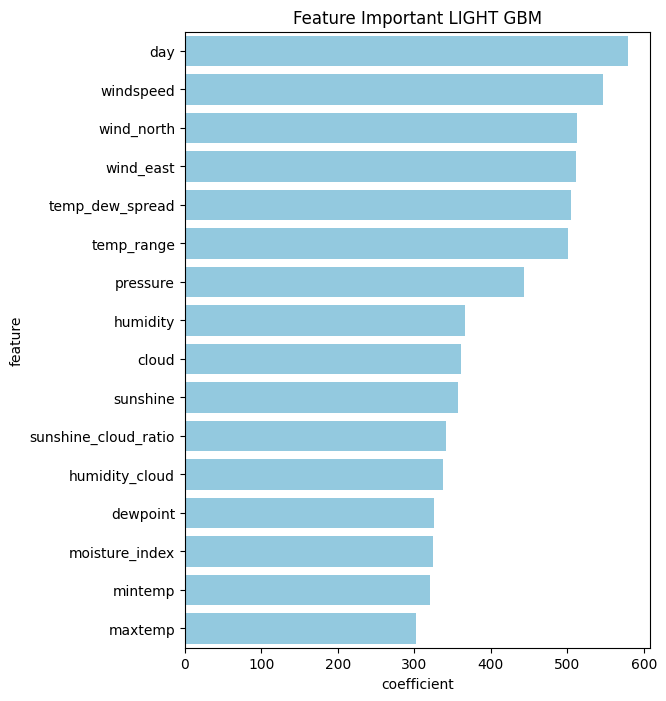

In [38]:
# SHOW FEATURE IMPORTANCES FOR LGBM


# CREATE DATAFRAME
features_importance = pd.DataFrame({
    'feature' : lgbm.feature_names_in_,     # GET FEATURE NAMES
    'coefficient' : lgbm.feature_importances_    # GET COEFFICIENT
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop= True)    # SORT BY DESCENDING

top_15 = features_importance.loc[:15, :] # GET 15 HIGHEST COEFFICIENT FEATURES FOR VISUALIZE
# VISUALIZE DATA
plt.figure(figsize=(6,8))
sns.barplot(x= top_15['coefficient'], y= top_15['feature'], color='skyblue')
plt.title('Feature Important LIGHT GBM')

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🤖 AdaBoost ⚡
  </p>
</font>

In [39]:
# BUILD ADABOOST MODEL

def adaboost_objective(trial):
    # SET HYPERPARAMETERS VALUE RANGE
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    base_estimator_max_depth = trial.suggest_int('base_estimator_max_depth', 3, 15)

    # SET DECISION TREE AS BASE ESTIMATOR
    base_estimator = DecisionTreeClassifier(max_depth=base_estimator_max_depth)

    # DECLARATE ADABOOST MODEL
    adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                                 n_estimators=n_estimators,
                                 learning_rate=learning_rate)

    # METRICS EVALUATION
    score = cross_val_score(estimator=adaboost, X=x_resampled, y=y_resampled, scoring='roc_auc')

    return score.mean()

# BUILD AND FIT OPTUNA
#study = optuna.create_study(direction='maximize')
#study.optimize(func=adaboost_objective, n_trials=20)

#print(f'Best Params : {study.best_params}')
#print(f'Best Scores : {study.best_value}')

#adaboost_best_params = study.best_params


'''Best Params : Trial 19 finished with value: 0.9241330914684015
{'n_estimators': 631, 'learning_rate': 0.9873704642286297, 'base_estimator_max_depth': 12}
'''

"Best Params : Trial 19 finished with value: 0.9241330914684015\n{'n_estimators': 631, 'learning_rate': 0.9873704642286297, 'base_estimator_max_depth': 12}\n"

In [40]:
# FIT AND TRAIN ADABOOST MODEL

adaboost_best_params = {'n_estimators': 631, 'learning_rate': 0.9873704642286297, 'base_estimator_max_depth': 12}

base_estimator = DecisionTreeClassifier(max_depth=adaboost_best_params['base_estimator_max_depth'])

adaboost = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=adaboost_best_params['n_estimators'],
    learning_rate=adaboost_best_params['learning_rate'],
    random_state=seed_value
)

# Train the model
adaboost.fit(x_resampled, y_resampled)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                   learning_rate=0.9873704642286297, n_estimators=631,
                   random_state=2024)

Text(0.5, 1.0, 'Feature Important AdaBoost')

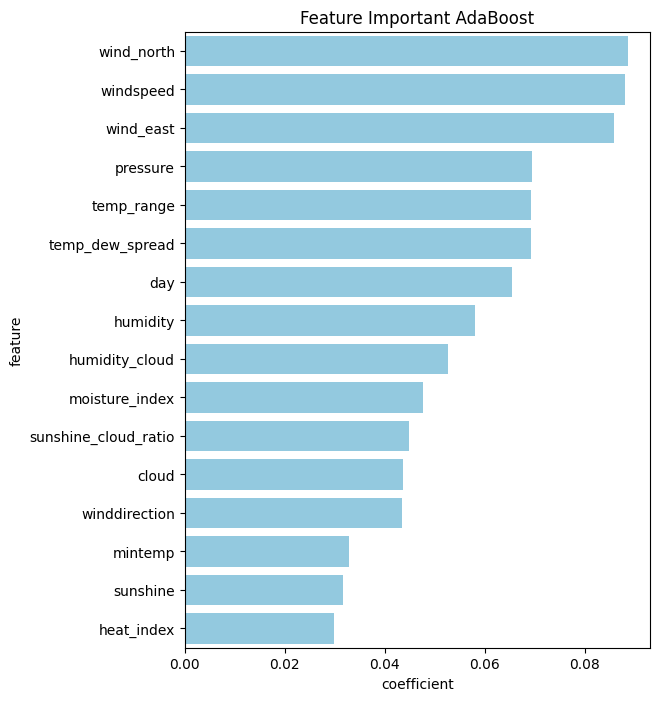

In [41]:
# SHOW FEATURE IMPORTANCES FOR ADABOOST


# CREATE DATAFRAME
features_importance = pd.DataFrame({
    'feature' : adaboost.feature_names_in_,     # GET FEATURE NAMES
    'coefficient' : adaboost.feature_importances_    # GET COEFFICIENT
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop= True)    # SORT BY DESCENDING

top_15 = features_importance.loc[:15, :] # GET 15 HIGHEST COEFFICIENT FEATURES FOR VISUALIZE
# VISUALIZE DATA
plt.figure(figsize=(6,8))
sns.barplot(x= top_15['coefficient'], y= top_15['feature'], color='skyblue')
plt.title('Feature Important AdaBoost')

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🤖 XGBOOST ⚡
  </p>
</font>

In [42]:
# BUILD XG-BOOST MODEL

def xg_objective(trial):

    n_estimators    = trial.suggest_int('n_estimators', 100, 2000)
    learning_rate   = trial.suggest_uniform('learning_rate', 0.01, 1)
    max_depth       = trial.suggest_int('max_depth', 2, 20)
    min_child_weight= trial.suggest_float('min_child_weight', 0.4, 10)
    subsample       = trial.suggest_uniform('subsample', 0.35, 1)
    gamma           = trial.suggest_float('gamma', 0.1, 1)
    reg_alpha       = trial.suggest_float('reg_alpha', 0.01, 15)
    reg_lambda      = trial.suggest_float('reg_lambda', 0.01, 15)

    xgboost = xgb.XGBClassifier(
        n_estimators     = n_estimators,
        learning_rate    = learning_rate,
        max_depth        = max_depth,
        min_child_weight = min_child_weight,
        subsample        = subsample,
        gamma            = gamma,
        reg_alpha        = reg_alpha,
        reg_lambda       = reg_lambda,
        random_state     = seed_value
    )
    
    score = cross_val_score(estimator= xgboost, X = x_resampled, y = y_resampled, scoring='roc_auc')

    return score.mean()


#study = optuna.create_study(direction='maximize')
#study.optimize(func= xg_objective, n_trials= 20)

#xgb_best_params = study.best_params


'''Best Params : Trial 15 finished with value: 0.9005402260988984
{'n_estimators': 751, 'learning_rate': 0.2370081389976112, 'max_depth': 7, 'min_child_weight': 9.895958505716344, 'subsample': 0.6370760160975184, 'gamma': 0.11998250705831778, 
'reg_alpha': 6.265433235121968, 'reg_lambda': 4.36382054864632}
'''

"Best Params : Trial 15 finished with value: 0.9005402260988984\n{'n_estimators': 751, 'learning_rate': 0.2370081389976112, 'max_depth': 7, 'min_child_weight': 9.895958505716344, 'subsample': 0.6370760160975184, 'gamma': 0.11998250705831778, \n'reg_alpha': 6.265433235121968, 'reg_lambda': 4.36382054864632}\n"

In [43]:
# FIT AND TRAIN XGBOOST MODEL

xgb_best_params = {'n_estimators': 751, 'learning_rate': 0.2370081389976112, 'max_depth': 7, 'min_child_weight': 9.895958505716344, 'subsample': 0.6370760160975184, 'gamma': 0.11998250705831778, 
'reg_alpha': 6.265433235121968, 'reg_lambda': 4.36382054864632}

xgboost = xgb.XGBClassifier(random_state= seed_value, **xgb_best_params)
xgboost.fit(x_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.11998250705831778, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2370081389976112,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9.895958505716344, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=751,
              n_jobs=None, num_parallel_tree=None, random_state=2024, ...)

Text(0.5, 1.0, 'Feature Important XGBOOST')

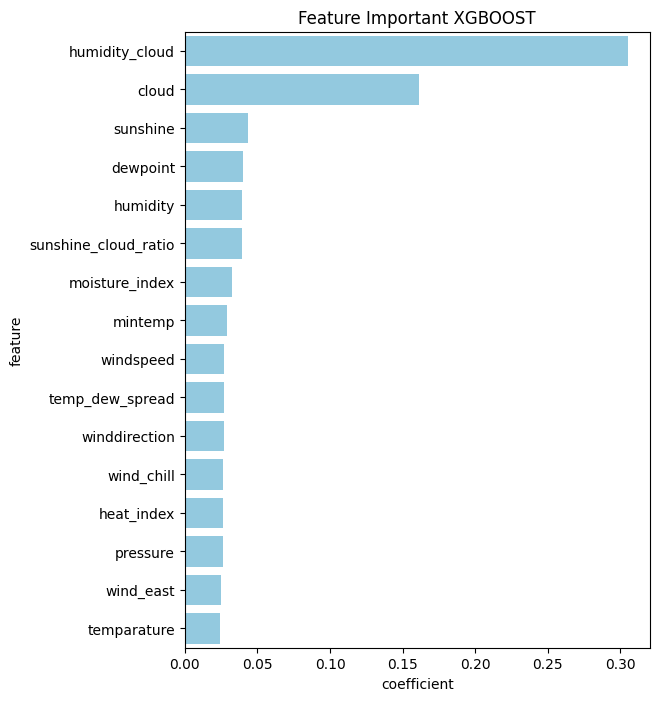

In [44]:
# SHOW FEATURE IMPORTANCES XGBOOST MODEL

features_importance = pd.DataFrame({
    'feature' : xgboost.feature_names_in_,   # GET FEATURE NAME
    'coefficient' : xgboost.feature_importances_   # GET COEFFICIENT
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop=True) # SORT IT BY DESCENDING AND RESET INDEX

top_15 = features_importance.loc[:15, :]
plt.figure(figsize=(6,8))
sns.barplot(x= top_15['coefficient'], y= top_15['feature'], color='skyblue')
plt.title('Feature Important XGBOOST')

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🤖 CatBoost ⚡
  </p>
</font>

In [45]:
# BUILD CATBOOST MODEL

def catboost_objective(trial):

    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.5, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'max_bin': trial.suggest_int('max_bin', 10, 500),
        'eval_metric': 'AUC', 

    }

    cat = catboost.CatBoostClassifier(**params, random_state= seed_value, verbose=0)

    score = cross_val_score(estimator=cat, X= x_resampled, y= y_resampled, scoring='roc_auc')

    return score.mean()

#study = optuna.create_study(direction='maximize')
#study.optimize(func=catboost_objective, n_trials=20)

#print(f'Best Params : {study.best_params}')
#print(f'Best Scores : {study.best_value}')


#catboost_best_params = study.best_params


'''Best Params : Trial 7 finished with value: 0.9232714174276726
{'iterations': 445, 'learning_rate': 0.031759978116715874, 'depth': 10, 'l2_leaf_reg': 0.13465148784245187, 'subsample': 0.6277247041610173, 
'colsample_bylevel': 0.712156508332904, 'min_data_in_leaf': 67, 'max_bin': 111}
'''

"Best Params : Trial 7 finished with value: 0.9232714174276726\n{'iterations': 445, 'learning_rate': 0.031759978116715874, 'depth': 10, 'l2_leaf_reg': 0.13465148784245187, 'subsample': 0.6277247041610173, \n'colsample_bylevel': 0.712156508332904, 'min_data_in_leaf': 67, 'max_bin': 111}\n"

In [46]:
%%capture

# FIT AND TRAIN CATBOOST MODEL

catboost_best_params = {'iterations': 445, 'learning_rate': 0.031759978116715874, 'depth': 10, 'l2_leaf_reg': 0.13465148784245187, 'subsample': 0.6277247041610173, 
'colsample_bylevel': 0.712156508332904, 'min_data_in_leaf': 67, 'max_bin': 111}

cat = catboost.CatBoostClassifier(random_state= seed_value, devices=0,**catboost_best_params)
cat.fit(x_resampled, y_resampled)

Text(0.5, 1.0, 'Feature Important CatBoost')

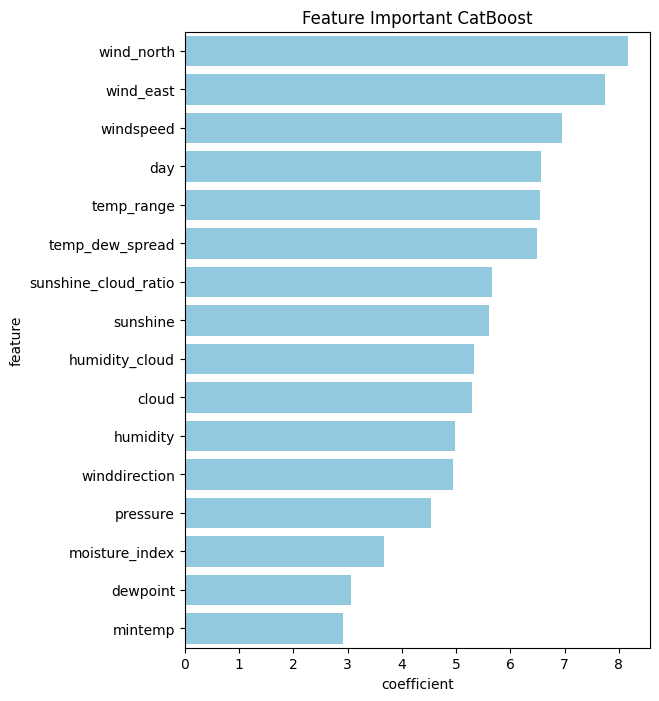

In [47]:
# SHOW FEATURE IMPORTANCES

# CREATE DATAFRAME
features_importance = pd.DataFrame({
    'feature' : x_train.columns,           # GET FEATURE NAME
    'coefficient' : cat.feature_importances_    # GET COEFFICIENT
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop= True)    # SORT COEFFICIENT BY DESCENDING

top_15 = features_importance.loc[:15, :]
plt.figure(figsize=(6,8))
sns.barplot(x= top_15['coefficient'], y= top_15['feature'], color='skyblue')
plt.title('Feature Important CatBoost')

<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    💡 Fusion Model: Combine-it All! 🔥💥
  </p>
</font>

In [48]:
%%capture
cv_fold = KFold(n_splits= 10, shuffle=True, random_state=12)

# CREATE STACKING CLASSIFIER
model = StackingClassifier(
    estimators=[
        ('GBM', gbm),
        ('LGBM', lgbm,),           
        ('AdaBoost', adaboost),
        ('xgb', xgboost),
        ('catboost', cat)
    ],  
        final_estimator = RandomForestClassifier(),  # META-MODEL
        cv=cv_fold
)

model.fit(x_resampled, y_resampled)

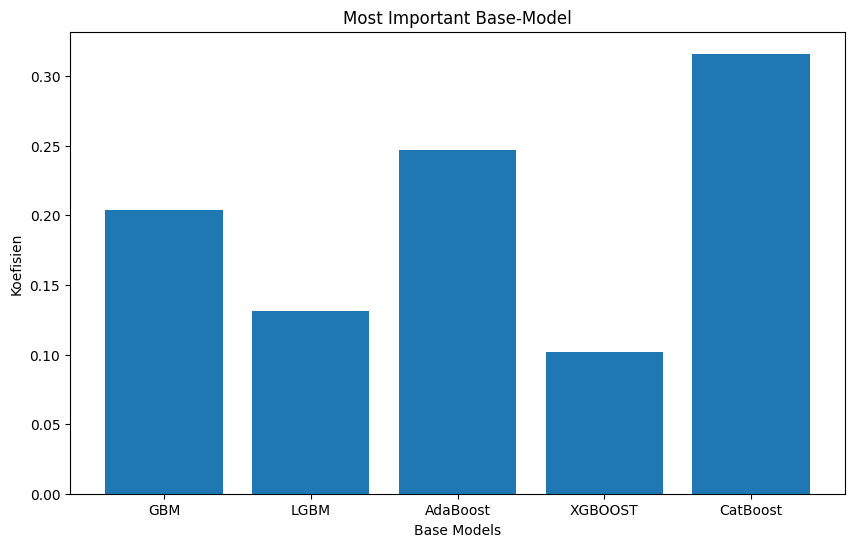

In [49]:
# BASE MODEL WE TRAINED
base_models = [ 'GBM', 'LGBM', 'AdaBoost', 'XGBOOST', 'CatBoost']

meta_model = model.final_estimator_ 
coefficients = meta_model.feature_importances_   # GET COEFFICIENT FOR EACH MODEL

# VISUALIZE MODEL IMPORTANCE
plt.figure(figsize=(10,6))
plt.bar(base_models, coefficients)
plt.xlabel('Base Models')
plt.ylabel('Koefisien')
plt.title('Most Important Base-Model')
plt.show()

In [58]:
# SAVE ML MODEL

import joblib

joblib.dump(model, 'stacking_model.pkl')

['stacking_model.pkl']

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🚑 Evaluation : Checking Model Result 🩺
  </p>
</font>

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <ul>
      <li> In the first 10 epochs, the model loss decreases significantly. This indicates that the model is learning well.
      <li>For the AUC score and accuracy score, it can be seen that the validation data results are better/higher than the train data, this is because the application of the ElasticNet regularization technique to the first hidden layers makes the model reduce the possibility of overfitting significantly. In addition, the use of dropout layers on hidden layers also plays an important role in overcoming overfitting</li>
  </ul>
</div>

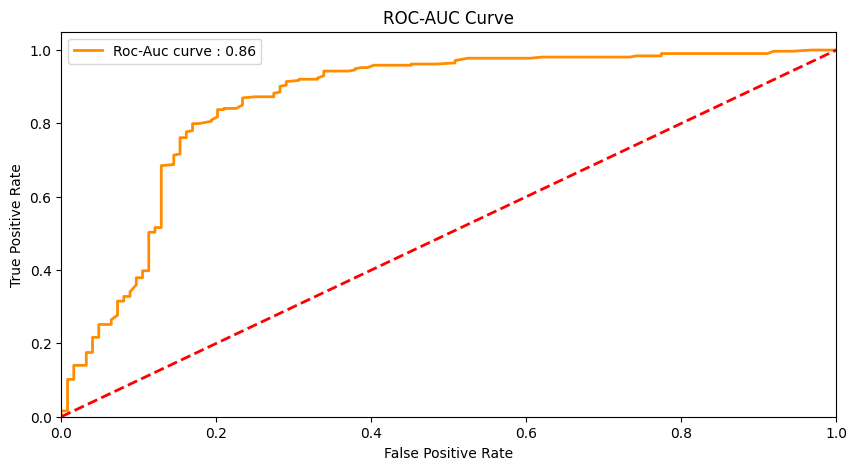

In [50]:
# EVALUATION VALIDATION DATA

y_pred = model.predict_proba(x_val)[:, 1]

# COMPUTE ROC_CURVE
fpr, tpr, threshold = roc_curve(y_val, y_pred)

# COMPUTE AUC
auc_score = auc(x= fpr, y= tpr)

# PLOT ROC CURVE
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Roc-Auc curve : {auc_score:.2f}')
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')    # RANDOM LINE (Random Classification)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>💻 ROC-AUC Score: 0.86</h4></strong>
  The AUC value of 0.8 indicates that the model has a good ability to distinguish between positive (rain) and negative (no rain) classes. This value is in the very-good range (0.8-1.0), which means the model:
  <ul style='margin-left:35px; margin-bottom:20px; margin-left:10px;' >
      <li> Has a high True Positive Rate (TPR) (able to detect most cases of rain). </li>
      <li> Has a low False Positive Rate (FPR) (rarely predicts rain when it doesn't actually happen).</li>
  </ul> 
  <div style=' font-size:16px;'>
      For that <strong>ROC - AUC value</strong>, I think the model is quite good at predicting it. However, I think it can still be improved. <br>
  OK, next we will check how confident the model is in predicting the data. 
  </div>
</div>

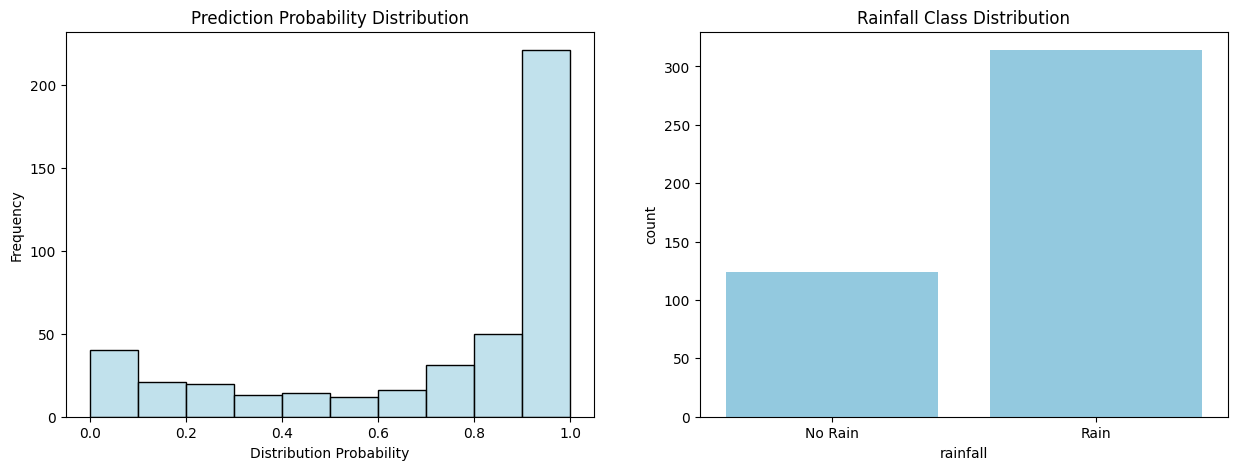

In [51]:
# DISPLAY DISTRIBUTION PROBABILITY PREDICTION

plt.figure(figsize=(15,5))

# DISPLAY PROBABILITY PREDICTED
plt.subplot(1,2,1)
sns.histplot(y_pred, bins=10, color='lightblue', legend=False)
plt.xlabel('Distribution Probability')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution')

# DISPLAY RAINFALL CLASS DISTRIBUTION AT VALIDATION DATA
plt.subplot(1,2,2)
sns.countplot(x = y_val, color='skyblue')
plt.xticks(ticks=[0, 1], labels=['No Rain', 'Rain'])
plt.title('Rainfall Class Distribution')
plt.show()

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>💻 Explanation:</h4></strong>
  <ul style='margin-left:35px; margin-bottom:20px; margin-left:10px;' >
      <li> A probability value close to 1 means that the model is very confident in predicting that the prediction is rain. </li>
      <li> A probability value close to 0 means that the model is very confident in predicting that it will not rain.</li>
      <li>Probability values ​​that are in the middle between the range 0 - 1 (for example ~0.5) indicate that the model is hesitant in predicting whether it will rain or not.</li> 
      <strong><h5>From the histogram Above, the model is more confident in predicting data that is believed to be rain than in predicting data that is believed to be no rain.</strong>
  </ul>
</div>

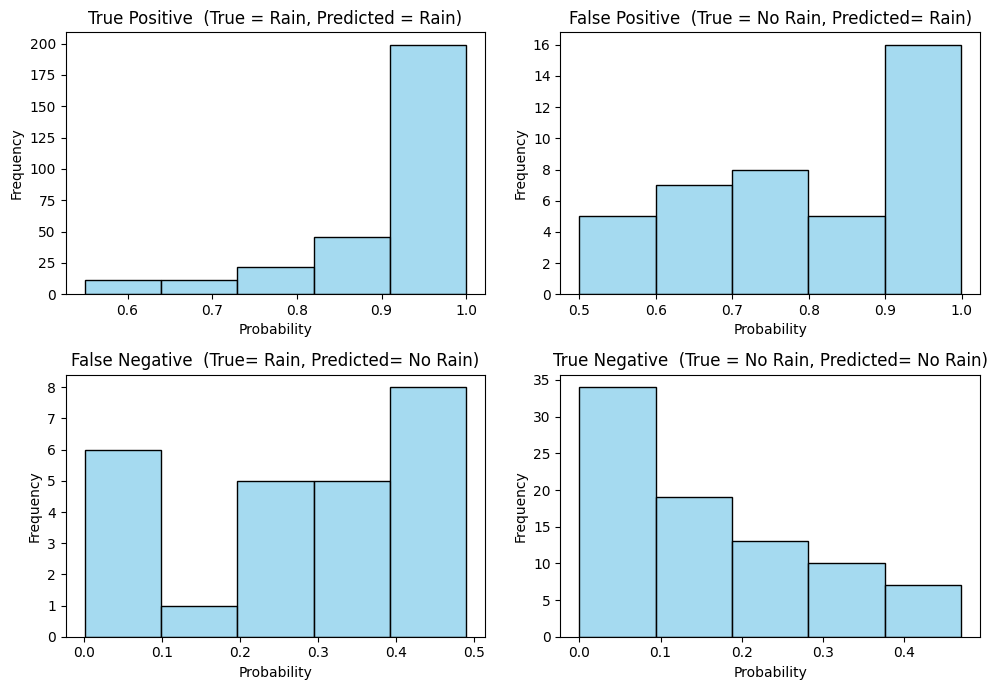

In [52]:
# SHOWING PROBABILITY DISTRIBUTIONS FOR TP, FP, FN, TN

y_preds = y_pred.flatten()   # CONVERT T0 1D ARRAY

# CALCULATE TP, FP, FN, TN
TP = (y_val == 1) & (y_preds >= 0.5)
FP = (y_val == 0) & (y_preds >= 0.5) 
FN = (y_val == 1) & (y_preds < 0.5)   
TN = (y_val == 0) & (y_preds < 0.5)   

total_data = len(y_val)
FP_percentage = len(FP) / total_data * 100
FN_percentage = len(FN) / total_data * 100

# DISPLAY HISTPLOT
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.histplot(y_preds[TP], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('True Positive  (True = Rain, Predicted = Rain)')

plt.subplot(2,2,2)
sns.histplot(y_preds[FP], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('False Positive  (True = No Rain, Predicted= Rain)')

plt.subplot(2,2,3)
sns.histplot(y_preds[FN], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('False Negative  (True= Rain, Predicted= No Rain)')

plt.subplot(2,2,4)
sns.histplot(y_preds[TN], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('True Negative  (True = No Rain, Predicted= No Rain)')

plt.tight_layout()

<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    🤖 Deep Learning Model: Fine-Tuning Feedforward Neural Network with Keras Tuner 🧠
  </p>
</font>

In [53]:
# BUILD FEEDFORWARD ARCHITECTURE WITH KERAS-TUNER

def build_model(hp):
    model = tf.keras.Sequential()

    # DEFINE INPUT LAYER
    model.add(tf.keras.layers.Input(shape= (x_train.shape[1],)))

    # FIRST HIDDEN LAYERS
    model.add(tf.keras.layers.Dense(units= hp.Int( name = 'hidden_layer_1', min_value= 150, max_value = 300, step= 15 ), 
                                    activation='relu', 
                                    kernel_initializer='HeNormal',
                                    kernel_regularizer= tf.keras.regularizers.L2( hp.Float(name= 'L2_Regularizer', 
                                                                                           min_value = 0.001, 
                                                                                           max_value= 0.015, 
                                                                                           default= 0.005))))
    
    # CREATE 1 - 3 MORE HIDDEN LAYERS (KERAS-TUNER WILL CHOOSE THE BEST COMBINATION)
    for i in range(hp.Int(name= 'num_layers', min_value = 1, max_value = 3)):
        
        model.add(tf.keras.layers.Dense(units= hp.Int( name = 'hidden_layer_' + str(i + 1), 
                                                      min_value = 35, 
                                                      max_value=200, 
                                                      step = 15 ),
                                                      
                                        activation='relu', 
                                        kernel_initializer='HeNormal'))
        # DROPOUT LAYERS
        model.add(tf.keras.layers.Dropout(rate= hp.Float( name = 'dropout_' + str(i+1), min_value=0.35, max_value=0.6, step=0.07)))
        

    # OUTPUT LAYERS
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='glorot_normal'))

    # DEFINE COMPILER
    model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

    return model

In [54]:
# DEFINE TUNER
tuner = kt.RandomSearch(hypermodel= build_model, 
                        objective= kt.Objective('val_auc', direction='max'), 
                        max_trials= 15, 
                        seed= 2025, 
                        tune_new_entries= True, 
                        allow_new_entries= True, 
                        max_retries_per_trial= 3, 
                        max_consecutive_failed_trials=2,
                        overwrite=True)

# DEFINE CALLBACKS
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=24, verbose=0, restore_best_weights=True) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', patience=10, verbose=1, min_lr= 0.000001, factor=0.4)

# SEARCH ALL COMBINATION BEST HYPERATAMETERS
tuner.search(x_train, y_train, batch_size= 32, epochs=100, validation_data= (x_val, y_val), callbacks=[reduce_lr, early_stopping])

Trial 15 Complete [00h 00m 09s]
val_auc: 0.9114444255828857

Best val_auc So Far: 0.9179936647415161
Total elapsed time: 00h 02m 48s


In [55]:
# BEST HYPERPARAMETERS

# GET BEST HYPERPARAMETERS
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

# SHOW BEST HYPERPARAMETERS
print('Best Hyperparameters : ')
best_trial.hyperparameters.values

'''Best Hyperparameters : 
  {'hidden_layer_1': 270,
 'L2_Regularizer': 0.01204902477928669,
 'num_layers': 2,
 'dropout_1': 0.35,
 'optimizer': 'adam',
 'hidden_layer_2': 50,
 'dropout_2': 0.35,
 'hidden_layer_3': 200,
 'dropout_3': 0.42} 
 '''

Best Hyperparameters : 


"Best Hyperparameters : \n  {'hidden_layer_1': 270,\n 'L2_Regularizer': 0.01204902477928669,\n 'num_layers': 2,\n 'dropout_1': 0.35,\n 'optimizer': 'adam',\n 'hidden_layer_2': 50,\n 'dropout_2': 0.35,\n 'hidden_layer_3': 200,\n 'dropout_3': 0.42} \n "

<font size='3px'>
  <p style='font-family: Signika+Negative; background-color:#E1F5FE; font-weight:bold; color:#0288D1; border:4px solid #0288D1; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
   🚑 Evaluation : Checking Model Result 🩺
  </p>
</font>

In [60]:
 

# TAKE BEST MODEL
best_model = tuner.get_best_models(num_models=1)[0]

# PREDICT
y_pred_prob = best_model.predict(x_val)

# CALCULATE ROC AUC SCORE
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')


 1/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
ROC AUC Score: 0.9180449969180193


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


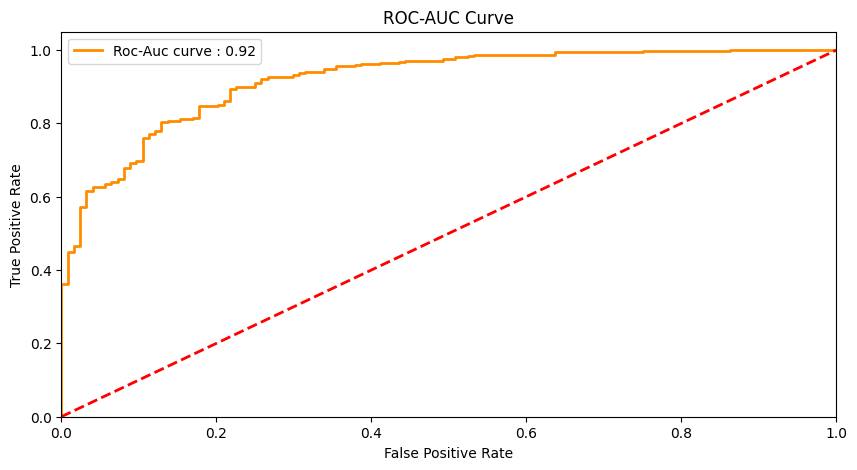

In [62]:
# EVALUATION VALIDATION DATA

y_pred = best_model.predict(x_val)

# COMPUTE ROC_CURVE
fpr, tpr, threshold = roc_curve(y_val, y_pred)

# COMPUTE AUC
roc_auc_score = auc(x= fpr, y= tpr)

# PLOT ROC CURVE
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Roc-Auc curve : {roc_auc_score:.2f}')
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')    # RANDOM LINE (Random Classification)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()

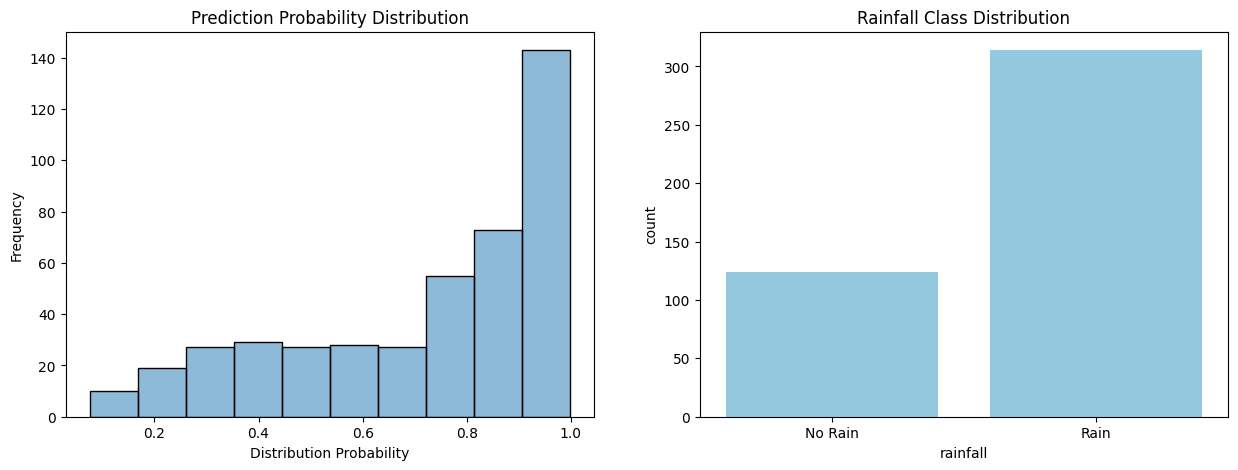

In [63]:
# DISPLAY DISTRIBUTION PROBABILITY PREDICTION

plt.figure(figsize=(15,5))

# DISPLAY PROBABILITY PREDICTED
plt.subplot(1,2,1)
sns.histplot(y_pred, bins=10, color='lightblue', legend=False)
plt.xlabel('Distribution Probability')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution')

# DISPLAY RAINFALL CLASS DISTRIBUTION AT VALIDATION DATA
plt.subplot(1,2,2)
sns.countplot(x = y_val, color='skyblue')
plt.xticks(ticks=[0, 1], labels=['No Rain', 'Rain'])
plt.title('Rainfall Class Distribution')
plt.show()

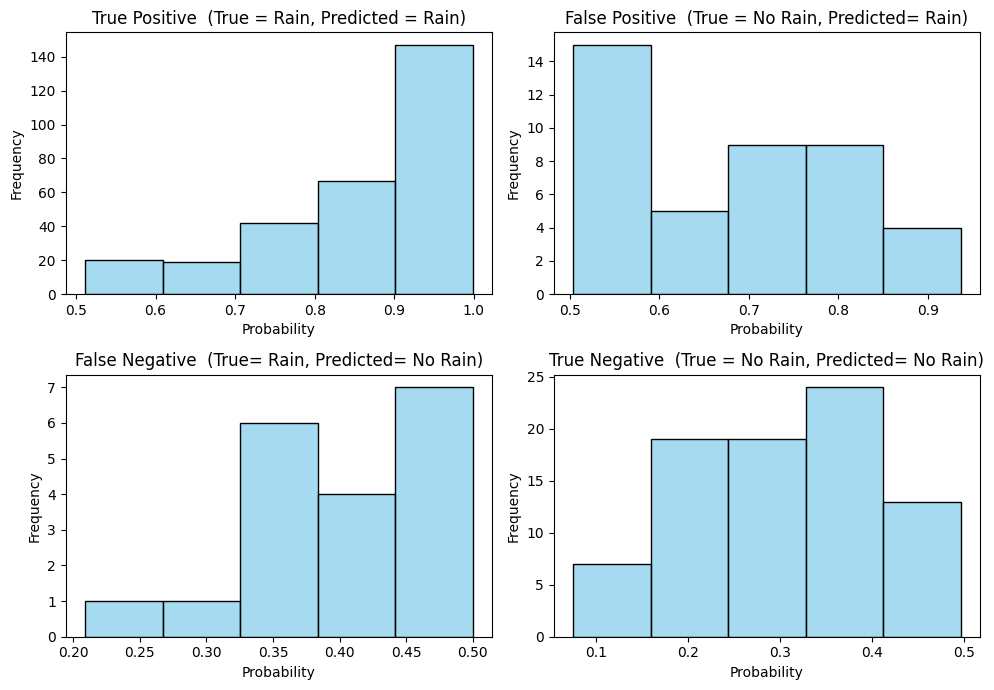

In [64]:
# SHOWING PROBABILITY DISTRIBUTIONS FOR TP, FP, FN, TN

y_preds = y_pred.flatten()   # CONVERT T0 1D ARRAY

# CALCULATE TP, FP, FN, TN
TP = (y_val == 1) & (y_preds >= 0.5)
FP = (y_val == 0) & (y_preds >= 0.5) 
FN = (y_val == 1) & (y_preds < 0.5)   
TN = (y_val == 0) & (y_preds < 0.5)   

total_data = len(y_val)
FP_percentage = len(FP) / total_data * 100
FN_percentage = len(FN) / total_data * 100

# DISPLAY HISTPLOT
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.histplot(y_preds[TP], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('True Positive  (True = Rain, Predicted = Rain)')

plt.subplot(2,2,2)
sns.histplot(y_preds[FP], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('False Positive  (True = No Rain, Predicted= Rain)')

plt.subplot(2,2,3)
sns.histplot(y_preds[FN], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('False Negative  (True= Rain, Predicted= No Rain)')

plt.subplot(2,2,4)
sns.histplot(y_preds[TN], bins=5, legend=False, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('True Negative  (True = No Rain, Predicted= No Rain)')

plt.tight_layout()

PermutationExplainer explainer: 439it [00:48,  7.98it/s]                         


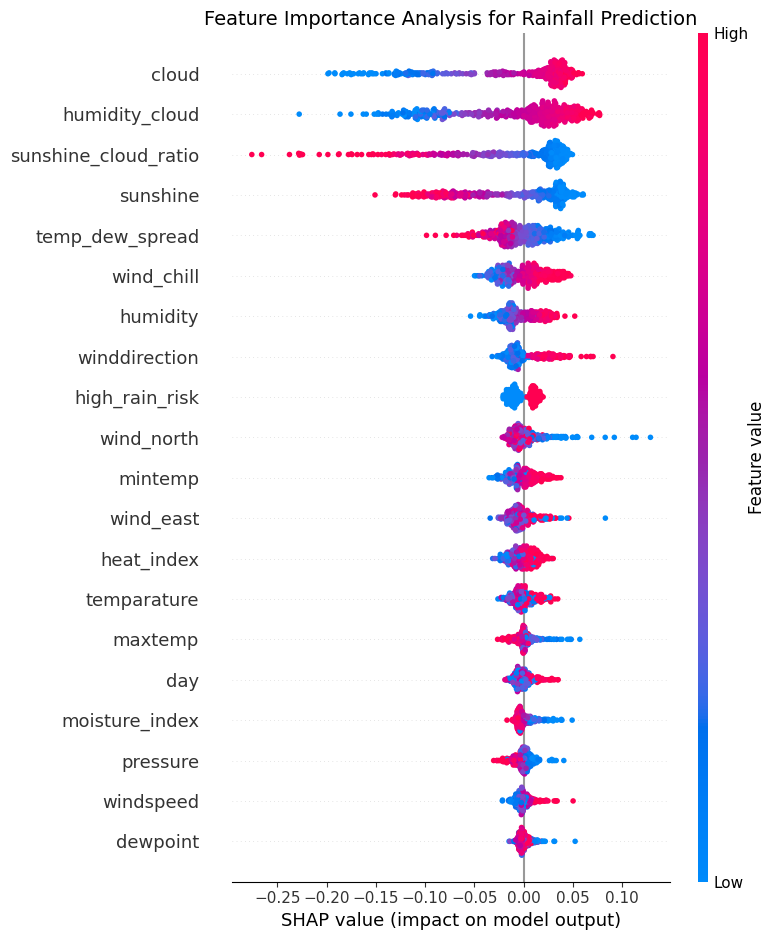

In [107]:
# CHECK FEATURE IMPORTANCES USING SHAP


# DEFINE SHAP
masker = shap.maskers.Independent(x_train)
explainer = shap.Explainer(best_model, masker)

shap_values = explainer.shap_values(x_val)


plt.title("Feature Importance Analysis for Rainfall Prediction", fontsize=14)

# PLOT SHAP
shap.summary_plot(shap_values, x_val, feature_names= x_train.columns.tolist())


<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📝 Explanation:</h4></strong>
  <ul>
    <li> A positive shap value means that the feature has positive impact to the model's prediction. And a negative shap value means that the feature has negative impact to the model's prediction. </li>
    <li> The bluer the point, the greater the feature value. The redder the data point, the lower the feature value. </li>
    <li> The wider the spread of points, the more influential that data feature becomes. </li>
    <li> Each point distribution represents 1 data sample </li>
    <li> <strong>cloud, sunshine_cloud_ratio, sunshine, humidity_cloud, temp_dew_spread </strong>features are 5 most influential features for <strong> rainfall prediction</strong></li>
</div>

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
After comparison, it turns out that the model evaluation results are better for the deep learning model. So we will use the deep learning model as the final test.
</div>

<font size='6px'>
  <p style='font-family: Signika+Negative; background-color:#C6F0FF; font-weight:bold; color:#10C0FF; border:4px solid #10C0FF; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>
    Test : Testing Model with Best Model 🧠
  </p>
</font>

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0.5, 1.0, 'Distribution of Predicted Classes')

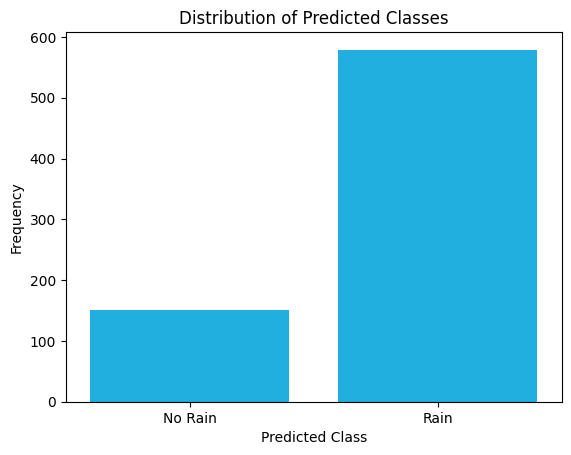

In [79]:
# PREDICT TEST SET USING BEST MODEL

y_predict = best_model.predict(new_test_data)


# DISPLAY DISTRIBUTION PREDICTED DATA
y_predict_class = [1 if proba >= 0.5 else 0 for proba in y_predict]   # CONVERT TO BINARY CLASS/LABEL
class_counts = [y_predict_class.count(0), y_predict_class.count(1)]   # COUNT TOTAL FOR EACH LABEL

sns.barplot(x = ['No Rain', 'Rain'], y = class_counts, color='deepskyblue')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Classes')

In [81]:
print(f'Model memprediksi {class_counts[0]} sample sebagai tidak hujan')
print(f'Model memprediksi {class_counts[1]} sample sebagai hujan')

Model memprediksi 151 sample sebagai tidak hujan
Model memprediksi 579 sample sebagai hujan


<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
setelah di test menggunakan data test, model lebih banyak mengenali data yg dianggap hujan dibanding tidak hujan. terlihat hampir 70% model memprediksi data test sebagai hujan, yg mana 579 jumlah data diprediksi sebagai hujan , sedangkan 151 data lainnya diprediksi sebagai tidak hujan oleh model. <br> <br>

**ok sekarang kita akan melihat distribusi probabilitas yg diprediksi oleh model**
</div>

Text(0.5, 1.0, 'Distribusi Probabilitas data yg diprediksi model')

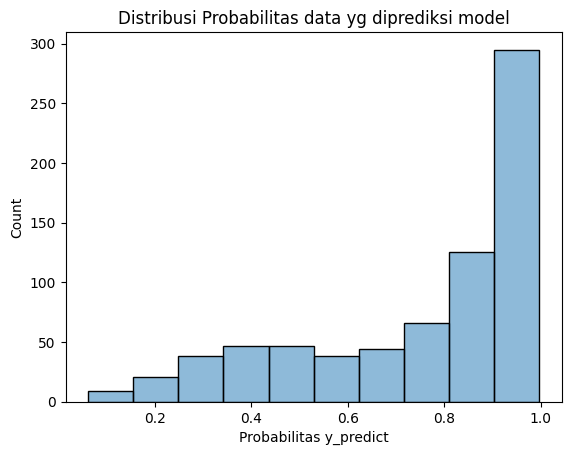

In [86]:
# DISTRIBUSI INI UNTUK MEMVISUALISASIKAN SEBERAPA YAKIN MODEL MEMPREDIKSI DATA YG BELUM PERNAH TERLIHAT SEBELUMNYA

sns.histplot(y_predict, bins=10, legend=False)
plt.xlabel('Probabilitas y_predict')
plt.title('Distribusi Probabilitas data yg diprediksi model')

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
Distribusi Probabilitas ini menunjukkan seberapa yakin model melakukan Prediksi terhadap data test. nilai yg mendekati 1 artinya model sangat yakin jika data yg diprediksi merupakan data yg diklasifikasikan sebagai hujan, dan nilai yg mendekati 0 artinya model sangat yakin jika data yg diprediksi merupakan data yg diklasifikasikan sebagai tidak hujan. nilai yg berada di tengah-tengah (diantara 0.5) artinya model ragu2 untuk menentukan apakah data tsb akan diklasifikasikan sebagai hujan/tidak hujan. 
<br><br>
    
**ok terakhir kita akan mengecek Karakteristik data untuk setiap kategori hujan dan tidak hujan yg telah diprediksi oleh model**
</div>

In [ ]:
# MARI KITA CEK KARAKTERISTIK SETIAP FITUR APAKAH TERDAPAT PERBEDAAN DATA ANTARA DATA YG DIPREDIKSI HUJAN DAN DATA YG DIPREDIKSI TIDAK HUJAN OLEH MODEL
# SAYA AKAN MELAKUKAN PERBANDINGAN MENGGUNAKAN UJI STATISTIK UJI-T

new_test_data['predicted_rainfall'] = y_predict_class

# FITUR YG AKAN DI BANDINGKAN
features = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'temp_range', 'temp_dew_spread', 'heat_index', 'wind_east',
       'wind_north', 'humidity_cloud', 'sunshine_cloud_ratio',
       'moisture_index', 'wind_chill', 'high_rain_risk']


# UNTUK MENYIMPAN HASIL PERBANDINGAN T-test
results = {}

# ITERATE OVER EVERY FEATURES
for feature in features:

    # TAKE DATA FROM DIFFERENT CLASS IN SAME FEATURE
    group_0 = new_test_data[new_test_data['predicted_rainfall'] == 0][feature]
    group_1 = new_test_data[new_test_data['predicted_rainfall'] == 1][feature]

    # T-test
    stat, p_value = stats.ttest_ind(group_0, group_1)

    # SAVE RESULT 
    results[feature] = {'t-statistic': stat, 'p-value': p_value}

# CONVERT TO DATAFRAME
results_df = pd.DataFrame(results).T

# ------------------------------------------------------------------------------

# BONFERRONI CORRECTION


p_values = [result['p-value'] for result in results.values()]  # GET ALL P-VALUES

# BONFERRONI CORRECTION
rejected, corrected_p_values, _, _ = smm.multipletests(p_values, alpha=0.05, method='bonferroni')

# PUSH BONFERRONI CORRECTION CALCULATIONS TO DATAFRAME
results_df['corrected p-value'] = corrected_p_values
results_df['Ditolak?'] = rejected
results_df

,t-statistic,p-value,corrected p-value,Ditolak?
day,0.336915,7.362778e-01,1.000000e+00,False
pressure,-0.516795,6.054565e-01,1.000000e+00,False
maxtemp,3.390152,7.362096e-04,1.546040e-02,True
temparature,2.397630,1.675244e-02,3.518013e-01,False
mintemp,1.527330,1.271134e-01,1.000000e+00,False
dewpoint,-1.720637,8.574171e-02,1.000000e+00,False
humidity,-15.133142,3.477611e-45,7.302983e-44,True
cloud,-41.457254,8.305177e-194,1.744087e-192,True
sunshine,29.613234,4.265211e-127,8.956943e-126,True
winddirection,0.430197,6.671796e-01,1.000000e+00,False


MARI KITA CEK KARAKTERISTIK SETIAP FITUR , APAKAH TERDAPAT PERBEDAAN DATA ANTARA DATA YG DIPREDIKSI HUJAN DAN DATA YG TIDAK DIPREDIKSI HUJAN OLEH MODEL MENGGUNAKAN UJI STATISTIK UJI-T

<div style="background-color:rgb(144, 209, 255); border-radius: 7px; font-size: 15px; color: #000000; border-left: 8px solid #1E88E5; border-top: 8px solid #1E88E5; padding:10px 15px">
  <h5 style="font-size: 16px; margin-bottom: 0px;">
  <h4><strong>📋 Bignote:</h4></strong>
      <strong>Uji-T</strong> A.K.A <strong>T-test</strong> digunakan untuk membandingkan rata-rata dari dua kelompok data untuk melihat apakah terdapat perbedaan yang signifikan di antara keduanya. <br><br>
      <strong>Terminology :</strong>
      <ol>
          <li><strong>t-statistics</strong> : perbedaan nilai antara rata-rata 2 kelompok berbeda dari nol(diukur dalam standard error)</li>
          <li><strong>p-value</strong> : nilai probabilitas yang menunjukkan seberapa kuat hasil uji statistik yg mendukung Hipotesis H0</li>
          <li><strong>corrected p-value</strong> : nilai p-value yg telah dilakukan <strong>Bonferroni Correction</strong></li>
          <li><strong>ditolak? </strong>: Keputusan akhir hipotesis.(<strong>False = Hipotesis H0 tidak ditolak, True = Hipotesis H0 Ditolak</strong>)</li>
      </ol>
      dari hasil diatas, saya membandingkan apakah ada perbedaan yg signifikan antara prediksi hujan dan tidak hujan untuk masing2 fitur menggunakan tingkat kepercayaan 95%. kira-kira seperti ini hipotesisnya : 
      <ul>
          <li><strong>Hipotesis H0</strong> : Tidak ada perbedaan signifikan antara rata-rata kedua kelompok. Artinya terdapat persamaan antara data yg diprediksi hujan dan tidak hujan. (Hipotesis H0 Tidak Ditolak)</li>
          <li><strong> Hipotesis H1</strong> : Terdapat perbedaan signifikan antara rata-rata kedua kelompok. Artinya data hujan dan tidak hujan sangat berbeda nilainya. (Hipotesis H0 Ditolak)</li>
      </ul>
      T-test Rule : 
      <ol>
          <li>Jika nilai p-value <= 0.05 , kita bisa menolak hipotesis H0. Artinya Hipotesis H1 diterima (terdapat perbedaan signifikan antara data hujan dan tidak hujan)</li>
          <li>Jika nilai p-value > 0.05, kita bisa mempertahankan hipotesis H0. Artinya tidak ada cukup bukti yg menyatakan kalau data hujan dan tidak hujan itu memiliki nilai perbedaan yg signifikan</li>
      </ol>
      <br>
      Terakhir saya menggunakan <strong>Bonferroni Correction</strong> untuk mengatasi masalah pengujian hipotesis yg terlalu banyak. maksudnya jika kita melakukan terlalu banyak T-test, kemungkinan terjadinya kesalahan tipe I (false positive) meningkat. Koreksi Bonferroni bertujuan untuk mengurangi kemungkinan tersebut dengan menyesuaikan tingkat signifikansi (alpha) yang digunakan. <br>
      Caranya adalah dengan membagi tingkat signifikansi/tingkat kepercayaan yang diinginkan (misalnya, 0,05) dengan jumlah uji yang dilakukan. Misalnya, jika saya melakukan 10 uji hipotesis dan menggunakan tingkat kepercayaan 0,05, maka tingkat kepercaayaan yang baru untuk setiap uji akan menjadi 0,05/10 = 0,005.

  </ul>
<br><br>
  <strong>dari hasil dataframe tersebut,11 dari 21 fitur tsb bernilai _true_ , artinya ia memiliki perbedaan nilai antara data yg diprediksi hujan dgn tidak hujan. dan sisanya yaitu 10 fitur memiliki kesamaan nilai antara data hujan dan tidak hujan.</strong> <br> <br>

  Fitur-fitur yg mempunyai perbedaan (True) = <strong>maxtemp, humidity, cloud, sunshine, windspeed, temp_range, temp_dew_spread, humidity_cloud, sunshine_cloud_ratio, moisture_index, high_rain_risk </strong> <br>
  Fitur-fitur yg tidak mempunyai perbedaan (False) = <strong>day, pressure, temparature, mintemp, dewpoint, winddirection, heat_index, wind_east, wind_north, wind_chill</strong>
</div>

In [119]:
# TERAKHIR , MARI KITA BANDINGKAN STATISTIK DESKRIPTIF NYA.

# SEBELUM ITU, MARI KITA UBAH NILAI NYA KE BENTUK SEMULA (DENORMALISASI)

# FITUR YG AKAN DILAKUKAN DENORMALISASI
cols_to_robust = ['pressure', 'dewpoint', 'humidity', 'cloud', 'windspeed', 'temp_range', 'temp_dew_spread', 'humidity_cloud', 'sunshine_cloud_ratio', 'moisture_index']
cols_to_zscore = ['day','maxtemp','temparature','mintemp','sunshine','winddirection', 'heat_index', 'wind_east', 'wind_north', 'wind_chill']

# COPY DATAFRAME
test_data_original = copy.deepcopy(new_test_data)

# DENORMALISASI UNTUK FITUR YG DILAKUKAN ROBUST SCALING
test_data_original[cols_to_robust] = robust.inverse_transform(test_data_original[cols_to_robust])

# DENORMALISASI UNTUK FITUR YG DILAKUKAN Z-SCORE NORM
test_data_original[cols_to_zscore] = zscore.inverse_transform(test_data_original[cols_to_zscore])

# SET UNLIMITED COLUMN
pd.set_option('display.max_columns', None)

# TAMPILKAN STATISTIK DATA UNTUK PREDIKSI HUJAN
print('Statistik Deskriptif Prediksi Hujan')
display(test_data_original[test_data_original['predicted_rainfall'] == 1].describe())

print()
print()

# TAMPILKAN STATISTIK DATA UNTUK PREDIKSI TIDAK HUJAN
print('Statistik Deskriptif Prediksi Tidak Hujan')
display(test_data_original[test_data_original['predicted_rainfall'] == 0].describe())


Statistik Deskriptif Prediksi Hujan


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,temp_range,temp_dew_spread,heat_index,wind_east,wind_north,humidity_cloud,sunshine_cloud_ratio,moisture_index,wind_chill,high_rain_risk,predicted_rainfall
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02,5.790000e+02,579.000000,579.000000,579.0
mean,182.328152,1013.556822,26.011572,23.724870,21.961140,20.635233,84.621762,84.031088,2.291537,103.212435,23.397582,4.050432,3.089637,20.642228,3.137602,2.147698,7135.958549,2.999950e-02,1.747755e+03,24.595334,0.609672,1.0
std,107.559058,5.379028,5.600583,5.178102,5.010369,5.103144,6.840264,8.662196,2.608500,80.670041,10.043669,1.572794,1.698950,5.093508,17.827945,17.803132,1097.015876,3.703692e-02,4.441641e+02,6.666859,0.488246,0.0
min,1.000000,1000.000000,7.400000,5.900000,4.200000,0.000000,49.000000,46.000000,0.000000,10.000000,4.500000,-0.600000,-1.200000,1.800000,-48.192097,-52.168070,3360.000000,-3.469447e-18,-2.273737e-13,3.533006,0.000000,1.0
25%,90.500000,1008.800000,21.300000,19.550000,17.700000,16.850000,79.000000,81.000000,0.200000,40.000000,15.300000,3.000000,2.000000,16.900000,-11.014545,-10.851650,6548.500000,2.234706e-03,1.496700e+03,19.359246,0.000000,1.0
50%,176.000000,1013.300000,27.500000,25.400000,23.600000,22.200000,84.000000,86.000000,1.300000,70.000000,22.100000,4.100000,3.000000,22.200000,5.797533,1.458579,7209.000000,1.477273e-02,1.870600e+03,26.776180,1.000000,1.0
75%,278.500000,1017.600000,30.900000,28.000000,26.100000,25.000000,90.000000,88.000000,3.500000,200.000000,29.100000,4.900000,4.000000,24.925000,15.452989,16.355234,7832.000000,4.350383e-02,2.078350e+03,30.136508,1.000000,1.0
max,365.000000,1027.100000,35.800000,31.800000,29.000000,26.700000,98.000000,100.000000,11.800000,300.000000,59.500000,13.100000,16.500000,27.400000,57.415479,54.320242,9800.000000,1.962963e-01,2.434600e+03,34.563997,1.000000,1.0




Statistik Deskriptif Prediksi Tidak Hujan


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,temp_range,temp_dew_spread,heat_index,wind_east,wind_north,humidity_cloud,sunshine_cloud_ratio,moisture_index,wind_chill,high_rain_risk,predicted_rainfall
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.0
mean,185.576159,1013.296689,27.756291,24.877483,22.682119,19.788742,75.185430,46.947020,8.928477,106.423841,18.982119,5.074172,5.088742,19.851656,1.352120,2.977706,3574.516556,0.211020,1506.845033,26.115681,0.0,0.0
std,97.171425,5.981877,5.752085,5.568868,5.726384,6.350869,6.761069,13.265388,1.725626,85.528509,8.794416,1.495035,1.991534,6.194636,13.942721,15.326416,1115.648098,0.095090,517.662360,7.104700,0.0,0.0
min,4.000000,1000.000000,13.200000,11.800000,6.400000,2.400000,39.000000,0.000000,2.200000,10.000000,6.100000,0.800000,1.400000,2.350000,-34.765924,-41.047601,0.000000,0.040000,128.700000,8.791850,0.0,0.0
25%,126.000000,1008.500000,23.300000,20.800000,18.750000,16.250000,73.000000,40.000000,8.100000,40.000000,12.450000,4.300000,3.900000,16.525000,-9.873622,-6.961526,2997.500000,0.154586,1235.000000,21.320797,0.0,0.0
50%,196.000000,1012.000000,30.100000,26.800000,24.800000,22.500000,75.000000,49.000000,9.100000,70.000000,15.800000,5.000000,4.800000,22.400000,3.485860,1.246422,3675.000000,0.185714,1732.500000,28.719054,0.0,0.0
75%,263.500000,1017.550000,32.650000,29.650000,27.150000,24.800000,78.000000,55.500000,10.200000,215.000000,25.100000,5.900000,5.950000,24.825000,12.091802,12.661648,4322.000000,0.234058,1873.600000,32.136994,0.0,0.0
max,361.000000,1032.200000,35.600000,31.700000,29.100000,26.300000,90.000000,73.000000,11.800000,300.000000,50.600000,11.600000,13.500000,27.000000,39.853097,46.195030,6072.000000,0.455000,2340.700000,34.790587,0.0,0.0


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #3498db; 
            border-top: 6px solid #3498db; 
            padding: 15px 20px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 18px; color: #3498db; font-weight: bold; margin-bottom: 15px;">🧬 Analisis dan Kesimpulan : 💡</h4>
  
  Analisis Perbandingan antara Data hujan dan tidak hujan:
  <ul>
      <li>sample untuk data tidak hujan berjumlah 151 sample, sedangkan sample untuk data hujan berjumlah 579 sample, 60% lebih banyak dibanding sample tidak hujan.</li>
      <li><strong>cloud : </strong>Pada data prediksi hujan, tutupan awan tidak hanya memiliki rata-rata tinggi (84.03%) tetapi juga distribusi yang sempit dengan nilai minimum 46% dan maksimum 100%. Kuartil pertama sudah mencapai 81%, menunjukkan dominasi langit berawan. Kontras dengan prediksi tidak hujan yang memiliki distribusi lebih lebar (0-73%) dengan median hanya 49%, menandakan kondisi langit yang jauh lebih bervariasi dan secara umum lebih cerah.</li>
      <li><strong>humidity : </strong>Kelembaban rata-rata prediksi hujan sangat tinggi (84.62%), dengan minimum 49% dan maksimum 98%. sementara Kelembaban rata-rata 75.19%, jauh lebih rendah dari dataset prediksi hujan (84.62%). Pada data hujan, 75% dari sampel memiliki kelembaban di atas 79%, sementara pada data tidak hujan, hanya 25% sampel yang mencapai kelembaban 78% atau lebih tinggi. Ini menunjukkan kelembaban konsisten tinggi adalah prasyarat untuk prediksi hujan.</li>
      <li><strong>sunshine : </strong>Distribusi durasi sinar matahari pada kedua dataset sangat kontras. Pada prediksi hujan, 75% sampel memiliki sinar matahari kurang dari 3.5 jam dengan median hanya 1.3 jam. Sebaliknya, pada prediksi tidak hujan, 75% sampel memiliki sinar matahari minimal 8.1 jam dengan median 9.1 jam. Deviasi standar pada data tidak hujan juga lebih kecil (1.73 vs 2.61), menunjukkan konsistensi kondisi cerah.</li>
      <li><strong>windspeed : </strong>Kecepatan angin rata-rata pada prediksi hujan ialah 23.40 km/jam. sementara Kecepatan angin rata-rata untuk prediksi tidak hujan berkisar 18.98 km/jam, lebih rendah dari dataset prediksi hujan. Meski rata-rata kecepatan angin lebih tinggi pada kondisi hujan, distribusinya menunjukkan perbedaan menarik. Pada data hujan, kecepatan angin maksimum mencapai 59.5 km/jam dengan standar deviasi tinggi (10.04), menunjukkan potensi kondisi badai. Pada data tidak hujan, nilai maksimum hanya 50.6 km/jam dengan distribusi lebih sempit (standar deviasi 8.79).</li>
      <li><strong>temp_range, temparature, mintemp, maxtemp : </strong>Prediksi tidak hujan menunjukkan rentang suhu harian yang konsisten lebih lebar di seluruh distribusi. Kuartil pertama, median, dan kuartil ketiga semuanya lebih tinggi dibandingkan data hujan, dengan median 5.0°C vs 4.1°C. Ini menunjukkan perubahan suhu lebih dinamis dalam kondisi tidak hujan, konsisten dengan radiasi matahari yang lebih tinggi di siang hari dan pendinginan radiasional yang lebih efektif di malam hari.</li>
      <li><strong>heat_index : </strong>Meski rata-rata heat index tidak terlalu berbeda (20.64°C vs 19.85°C), sebaran data menunjukkan perbedaan penting. Pada data hujan, distribusi cenderung lebih sempit di sekitar nilai tengah (IQR = 24.93-16.90 = 8.03), sementara pada data tidak hujan, distribusi lebih lebar (IQR = 24.83-16.53 = 8.30) dengan nilai minimum lebih rendah. Ini mengindikasikan kondisi termal yang lebih stabil pada kondisi hujan.</li>
      <li><strong>moisture_index : </strong>Indeks kelembaban menunjukkan distribusi yang sangat berbeda. Pada data hujan, distribusi lebih lebar dengan standar deviasi 444.16 dan rentang dari ~0 hingga 2434.6. Pada data tidak hujan, meski rata-rata lebih rendah, distribusi jauh lebih lebar dengan nilai maksimum mencapai 2340.7. Distribusi ini menunjukkan bahwa meski kelembaban umumnya lebih rendah pada kondisi tidak hujan, terdapat heterogenitas yang lebih tinggi.</li>
      <li><strong>wind_east, wind_north (komponen angin) : </strong>Analisis komponen angin menunjukkan perbedaan menarik. Pada data hujan, komponen angin utara (wind_north) memiliki distribusi yang sangat lebar dengan standar deviasi tinggi (17.83). Sebaliknya, pada data tidak hujan, sebaran lebih sempit dengan standar deviasi 15.33. Hal ini mengindikasikan kondisi angin yang lebih variatif pada kondisi hujan.</li>
  </ul>

  Kesimpulan : 
  <ol>
      <li>Beberapa variabel seperti cloud, sunshine, dan rasio sunshine-cloud menunjukkan distribusi yang hampir sepenuhnya terpisah antara kedua kelompok data. artinya fitur2 ini mempunyai pengaruh signifikan terhadap model prediksi</li>
      <li>Data hujan menunjukkan stabilitas tinggi dalam beberapa fitur (terutama cloud dan humidity) dengan distribusi sempit, sementara data tidak hujan menunjukkan variabilitas lebih tinggi.</li>
      <li>Model tampak efektif dalam membedakan kondisi fitur untuk hujan vs tidak hujan</li>
      <li>Model prediksi tampak menggunakan kombinasi kompleks dari beberapa variabel/fitur.</li>
  </ol>
</div>